# Exploring Sean's BDT background estimate

**Plan:** I was looking into the signal, and it seemed like most of our signal efficiency came from situations where we had most of the bs passing the tightest WP, while one of these could be quite a bit looser.

It's nice to know where the signal efficiency is coming from, but the biggest question is whether these cuts actually help us in reducing the background.

To answer this question, we need to know how to model the background in these different phase space regions, and I can start understanding how the $2b \rightarrow 4b$ reweighting applies in tighter regions.

To do this, I'm going to start by comparing the $2b$ and $4b$ distributions in the CR and VR.

There really isn't any reason why we might expect that something like this would work since we know $b$-tagging interacts non trivially with the kinematics. But Michael also said that if we're cutting more tightly on the signal, we can use the signal depleted regions to derive a background estimate that is closer to $4b$ and do something more similar to the boosted analysis.



In [1]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
os.sys.path.append("../code")
from AnalysisUtils import nanoToDf

%load_ext autoreload
%autoreload 2

**Step 1:** Load in the 60% and 70% WP DataFrames for DL1r that Sean trained w/ the BDT pairing.

I'll just load in the CR for starters, b/c these datasets are a bit large.

In [10]:
SeanDir = "../../public/hh4b/bTagOptStudies/SeansFiles"
df_60 = nanoToDf(f"{SeanDir}/dl1r/60/data16_with_weights.root","fullmassplane")
df_70 = nanoToDf(f"{SeanDir}/dl1r/70/data16_with_weights.root","fullmassplane")
df_77 = nanoToDf(f"{SeanDir}/dl1r/77/data16_with_weights.root","fullmassplane")
df_85 = nanoToDf(f"{SeanDir}/dl1r/85/data16_with_weights.root","fullmassplane")

fullmassplane


Start off by comparing the overall yields to see what subset of the data I'm actually looking at?

Oh, It would be super cool to make this a MultiIndex dataframe!!

In [ ]:
index = pd.MultiIndex.from_tuples(itertools.product(['CR','VR','SR'],['2b','3b','4b']))

yields = pd.DataFrame(0,index,['fixed 60% WP', 'fixed 70% WP','n(70%) / n(60%)'])

for idx, (region, nb) in zip(index,itertools.product([2,1,0],[2,3,4])):
    
    if (region==0) and (nb>2):
        continue
    
    if nb == 4:
        n60 = np.sum((df_60.ntag>=nb)&(df_60.kinematic_region==region))
        n70 = np.sum((df_70.ntag>=nb)&(df_70.kinematic_region==region)) 
    else:
        n60 = np.sum((df_60.ntag==nb)&(df_60.kinematic_region==region))
        n70 = np.sum((df_70.ntag==nb)&(df_70.kinematic_region==region)) 
    
    yields.loc[idx,'fixed 60% WP'] = n60
    yields.loc[idx,'fixed 70% WP'] = n70
    yields.loc[idx,'n(70%) / n(60%)'] = n70 / n60

In [ ]:
yields

- Loosening the b-tagging WP gives more events to play with in all of the categories! However, when you move to the looser WP you also have a migration of events from the lower $b$-tagged region to the higher b-tagged region.
- Also, right out of the bat I thought this was promising that the yields between the WPs were *consistent* as we extrapolated from the CR into the SR.

In [6]:
1.2**2

1.44

But it's not really about the yields, because the motivating question that I'm trying to answer is whether or not I can gain in significance by dividing up these categories!

So to answer this question, I'm going to look in the CR, VR, and SR for both signal and background (although not background in the SR) to try to get an estimate of which quantile categroization might help us *maximize* $s/\sqrt{b}$!


In [7]:
# Load in the signal dataframe
fDir = "../../hh4b/hh4b-resolved-reconstruction" 
sig = nanoToDf(f"{fDir}/bdt_dl1r_70.root",ttree="sig")

sm_85 = nanoToDf(f"{fDir}/bdt_dl1r_85.root",ttree="fullmassplane")

lumi15 = 3.2195
lumi16 = 24.5556
L = lumi15+lumi16

sig['mc_sf'] *= L
sm_85['mc_sf'] *= L


sig
fullmassplane


In [45]:
df_77 = nanoToDf(f"{SeanDir}/dl1r/77/data16_with_weights.root","fullmassplane")

fullmassplane


In [46]:
# Need to aggregate the quantile information in these dfs to do these next studies
qCols = ['quantile_h1_j1','quantile_h1_j2','quantile_h2_j1','quantile_h2_j2']

for df in [df_60,df_70,df_77,df_85, sig,sm_85]:
    for qi in range(1,6):
        c = f'nQ{qi}'
        df[c] = np.sum(df[qCols]==qi,axis=1)

In [9]:
qs_4b = [
    # 60% WPs
    '4 Q5',
    # Extra PC options w/ 70% WP
    '3 Q5, 1 Q4',
    '2 Q5, 2 Q4',
    '1 Q5, 3 Q4',
    '4 Q4',
    # Extra PC options w/ 77% WP
    '3 Q5, 1 Q3',
    '2 Q5, 1 Q4, 1 Q3',
    '1 Q5, 2 Q4, 1 Q3',
    '3 Q4, 1 Q3',
    
    '2 Q5, 2 Q3',
    '1 Q5, 1 Q4, 2 Q3',
    '2 Q4, 2 Q3',
    
    '1 in Q5, 3 in Q3',
    '1 in Q4, 3 in Q3',
    
    '4 Q3',
    # Extra PC options w/ 85% WP
    '3 Q5, 1 Q2',
    
    '2 Q5, 1 Q4, 1 Q2',
    '2 Q5, 1 Q3, 1 Q2',
    
    '1 Q5, 2 Q4, 1 Q2',
    '1 Q5, 1 Q4, 1 Q3, 1 Q2',
    '1 Q5, 2 Q3, 1 Q2',
    
    '3 Q4, 1 Q2',
    '2 Q4, 1 Q3, 1 Q2',
    '1 Q4, 2 Q3, 1 Q2',
    '3 Q3, 1 Q2',
    
    '2 Q5, 2 Q2',
    '1 Q5, 1 Q4, 2 Q2',
    '1 Q5, 1 Q3, 2 Q2',
    '2 Q4, 2 Q2',
    '1 Q4, 1 Q3, 2 Q2',
    '2 Q3, 2 Q2',
    '1 Q5, 3 Q2',
    '1 Q4, 3 Q2',
    '1 Q4, 3 Q2',
    '4 Q2'
]

index = pd.MultiIndex.from_tuples(itertools.product(['CR','VR','SR'],
                                                    qs_4b))

quants = pd.DataFrame(0,index,['SM NR', '2016 data','$s/b$','$s/\sqrt{b}$'])


for k,region in zip([2,1,0],['CR','VR','SR']):
    
    for c, df in zip(['SM NR', '2016 data'],[sm_85,df_85]):
    
        if (k==0) & ('data' in c):
            continue

        # 60% WPs
        quants.loc[(region,'4 Q5'),c] = df.loc[(df.nQ5==4) & (df.kinematic_region==k),'mc_sf'].sum()
        
        # Extra PC options w/ 70% WP
        quants.loc[(region,'3 Q5, 1 Q4'),c] = df.loc[(df.nQ5==3) & (df.nQ4==1) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'2 Q5, 2 Q4'),c] = df.loc[(df.nQ5==2) & (df.nQ4==2) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q5, 3 Q4'),c] = df.loc[(df.nQ5==1) & (df.nQ4==3) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'4 Q4'),c]       = df.loc[(df.nQ4==4) & (df.kinematic_region==k),'mc_sf'].sum()
        
        # Extra PC options w/ 77% WP
        quants.loc[(region,'3 Q5, 1 Q3'),c] = df.loc[(df.nQ5==3) & (df.nQ3==1) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'2 Q5, 1 Q4, 1 Q3'),c] = df.loc[(df.nQ5==2) & (df.nQ4==1) & (df.nQ3==1) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q5, 2 Q4, 1 Q3'),c] = df.loc[(df.nQ5==1) & (df.nQ4==2) & (df.nQ3==1) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'3 Q4, 1 Q3'),c]       = df.loc[(df.nQ4==3) & (df.nQ3==1) & (df.kinematic_region==k),'mc_sf'].sum()

        quants.loc[(region,'2 Q5, 2 Q3'),c] = df.loc[(df.nQ5==2) & (df.nQ3==2) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q5, 1 Q4, 2 Q3'),c] = df.loc[(df.nQ5==1) & (df.nQ4==1) & (df.nQ3==2) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'2 Q4, 2 Q3'),c] = df.loc[(df.nQ4==2) & (df.nQ3==2) & (df.kinematic_region==k),'mc_sf'].sum()

        quants.loc[(region,'1 in Q5, 3 in Q3'),c] = df.loc[(df.nQ5==1) & (df.nQ3==3) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 in Q4, 3 in Q3'),c] = df.loc[(df.nQ4==1) & (df.nQ3==3) & (df.kinematic_region==k),'mc_sf'].sum()

        quants.loc[(region,'4 Q3'),c] = df.loc[(df.nQ3==4) & (df.kinematic_region==k),'mc_sf'].sum()

        # Extra PC options w/ 85% WP
        quants.loc[(region,'3 Q5, 1 Q2'),c] = df.loc[(df.nQ5==3) & (df.nQ2==1) & (df.kinematic_region==k),'mc_sf'].sum()

        quants.loc[(region,'2 Q5, 1 Q4, 1 Q2'),c] = df.loc[(df.nQ5==2) & (df.nQ4==1) & (df.nQ2==1) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'2 Q5, 1 Q3, 1 Q2'),c] = df.loc[(df.nQ5==2) & (df.nQ3==1) & (df.nQ3==1) & (df.kinematic_region==k),'mc_sf'].sum()

        quants.loc[(region,'1 Q5, 2 Q4, 1 Q2'),c] = df.loc[(df.nQ5==1) & (df.nQ4==2) & (df.nQ2==1) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q5, 1 Q4, 1 Q3, 1 Q2'),c] = df.loc[(df.nQ5==1) & (df.nQ4==1) & (df.nQ3==1) & (df.nQ2==1) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q5, 2 Q3, 1 Q2'),c] = df.loc[(df.nQ5==1) & (df.nQ3==2) & (df.nQ2==1) & (df.kinematic_region==k),'mc_sf'].sum()

        quants.loc[(region,'3 Q4, 1 Q2'),c] = df.loc[(df.nQ4==3) & (df.nQ2==1) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'2 Q4, 1 Q3, 1 Q2'),c] = df.loc[(df.nQ4==2) & (df.nQ3==1) & (df.nQ2==1) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q4, 2 Q3, 1 Q2'),c] = df.loc[(df.nQ4==1) & (df.nQ3==2) & (df.nQ2==1) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'3 Q3, 1 Q2'),c] = df.loc[(df.nQ3==3) & (df.nQ2==1) & (df.kinematic_region==k),'mc_sf'].sum()

        quants.loc[(region,'2 Q5, 2 Q2'),c] = df.loc[(df.nQ5==2) & (df.nQ2==2) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q5, 1 Q4, 2 Q2'),c] = df.loc[(df.nQ5==1) & (df.nQ4==1) & (df.nQ2==2) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q5, 1 Q3, 2 Q2'),c] = df.loc[(df.nQ5==1) & (df.nQ3==1) & (df.nQ2==2) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'2 Q4, 2 Q2'),c] = df.loc[(df.nQ4==2) & (df.nQ2==2) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q4, 1 Q3, 2 Q2'),c] = df.loc[(df.nQ4==1) & (df.nQ3==1) & (df.nQ2==2) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'2 Q3, 2 Q2'),c] = df.loc[(df.nQ3==2) & (df.nQ2==2) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q5, 3 Q2'),c] = df.loc[(df.nQ5==1) & (df.nQ2==3) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q4, 3 Q2'),c] = df.loc[(df.nQ4==1) & (df.nQ2==3) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'1 Q4, 3 Q2'),c] = df.loc[(df.nQ3==1) & (df.nQ2==3) & (df.kinematic_region==k),'mc_sf'].sum()
        quants.loc[(region,'4 Q2'),c] = df.loc[(df.nQ2==4) & (df.kinematic_region==k),'mc_sf'].sum()

quants

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2855: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


SM NR  2016 data  $s/b$  $s/\sqrt{b}$
CR 4 Q5        2.190288e-02     4868.0      0             0
   3 Q5, 1 Q4  1.243529e-02     3415.0      0             0
   2 Q5, 2 Q4  3.235185e-03     1048.0      0             0
   1 Q5, 3 Q4  5.457894e-04      148.0      0             0
   4 Q4        3.799454e-06       12.0      0             0
...                     ...        ...    ...           ...
SR 2 Q3, 2 Q2  2.454165e-06        0.0      0             0
   1 Q5, 3 Q2  4.127465e-05        0.0      0             0
   1 Q4, 3 Q2  1.011899e-06        0.0      0             0
   1 Q4, 3 Q2  1.011899e-06        0.0      0             0
   4 Q2        3.095864e-07        0.0      0             0

[105 rows x 4 columns]

In [10]:
bmask = (quants['2016 data']!=0)

quants['$s/b$'][bmask] = quants['SM NR'][bmask] / quants['2016 data'][bmask]
quants['$s/\sqrt{b}$'][bmask] = quants['SM NR'][bmask] / np.sqrt(quants['2016 data'][bmask])

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
quants

SM NR  2016 data         $s/b$  $s/\sqrt{b}$
CR 4 Q5        2.190288e-02     4868.0  4.499358e-06      0.000314
   3 Q5, 1 Q4  1.243529e-02     3415.0  3.641373e-06      0.000213
   2 Q5, 2 Q4  3.235185e-03     1048.0  3.087009e-06      0.000100
   1 Q5, 3 Q4  5.457894e-04      148.0  3.687766e-06      0.000045
   4 Q4        3.799454e-06       12.0  3.166212e-07      0.000001
...                     ...        ...           ...           ...
SR 2 Q3, 2 Q2  2.454165e-06        0.0  0.000000e+00      0.000000
   1 Q5, 3 Q2  4.127465e-05        0.0  0.000000e+00      0.000000
   1 Q4, 3 Q2  1.011899e-06        0.0  0.000000e+00      0.000000
   1 Q4, 3 Q2  1.011899e-06        0.0  0.000000e+00      0.000000
   4 Q2        3.095864e-07        0.0  0.000000e+00      0.000000

[105 rows x 4 columns]

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:18: PerformanceWarning: indexing past lexsort depth may impact performance.
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:33: PerformanceWarning: indexing pa

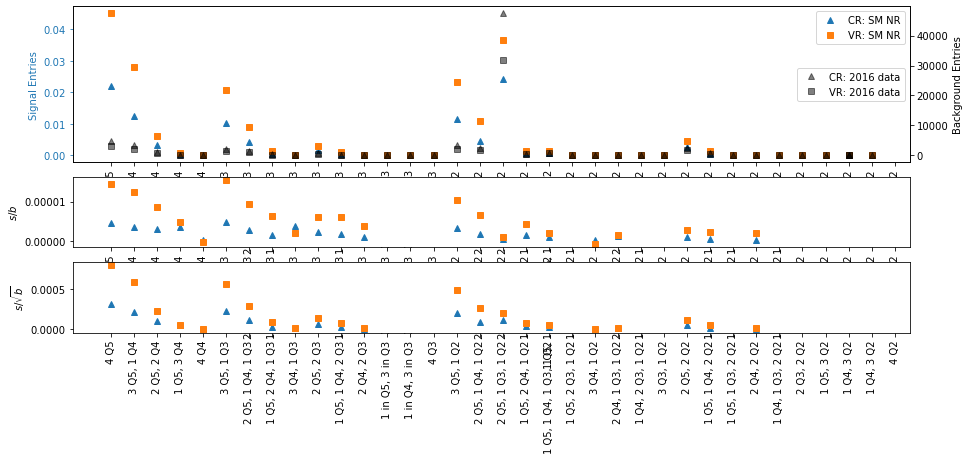

In [12]:
fig = plt.figure(figsize=(15,6))

gs = gridspec.GridSpec(4,1)
ax1 = fig.add_subplot(gs[:2,0])
ax3 = fig.add_subplot(gs[2:3,0],sharex=ax1)
ax4 = fig.add_subplot(gs[3:,0], sharex=ax1)

color='C0'
ax1.plot(quants.loc['CR','SM NR'],color=color,label='CR: SM NR',
         linewidth=0,marker='^')
ax1.plot(quants.loc['VR','SM NR'],color='C1',label='VR: SM NR',
         linewidth=0,marker='s')
# ax1.plot(quants.loc['SR','SM NR'],color='C6',label='SR: SM NR',
#          linewidth=0,marker='o')

ax2 = ax1.twinx()

plt.plot(quants.loc['CR','2016 data'],color='k',label='CR: 2016 data',
         linewidth=0,marker='^',alpha=0.5)
plt.plot(quants.loc['VR','2016 data'],color='k',label='VR: 2016 data',
         linewidth=0,marker='s',alpha=0.5)

ax1.legend()
ax2.legend(loc='center right')

ax1.set_ylabel("Signal Entries")
ax1.tick_params(axis='y', colors=color)
ax1.yaxis.label.set_color(color)

ax2.set_ylabel("Background Entries")

# s / b
ax3.plot(quants.loc['CR','SM NR']/quants.loc['CR','2016 data'],
         color=color, linewidth=0, marker='^')
ax3.plot(quants.loc['VR','SM NR']/quants.loc['VR','2016 data'],
         color='C1', linewidth=0, marker='s')
ax3.set_ylabel('$s/b$')

# s / sqrt(b)
ax4.plot(quants.loc['CR','SM NR']/np.sqrt(quants.loc['CR','2016 data']),
         color=color, linewidth=0, marker='^')
ax4.plot(quants.loc['VR','SM NR']/np.sqrt(quants.loc['VR','2016 data']),
         color='C1', linewidth=0, marker='s')
ax4.set_ylabel('$s/\sqrt{b}$')


# Make the x-axis labels meaningful
for ax in [ax1,ax3]:
    ax.set_xticks(range(len(qs_4b)))
    ax.set_xticklabels(['']*len(qs_4b),rotation=90)
    
ax4.set_xticks(range(len(qs_4b)))
ax4.set_xticklabels(qs_4b,rotation=90)

plt.show()

The most striking feature of the plot above is that the 2 Q5, 1 Q3, 1 Q2 category has *a lot* of background!!

I think what I should try to do first though is understand the 60% and 70% WPs a bit better, and then the 70% before trying to understand what's up with our loss of efficiency for the 85% WP.


In [13]:
len(qs_4b)

35

In [14]:
quants.loc[('CR',qs_4b[:15]),'SM NR']

CR  4 Q5                0.021903
    3 Q5, 1 Q4          0.012435
    2 Q5, 2 Q4          0.003235
    1 Q5, 3 Q4          0.000546
    4 Q4                0.000004
    3 Q5, 1 Q3          0.010384
    2 Q5, 1 Q4, 1 Q3    0.004132
    1 Q5, 2 Q4, 1 Q3    0.000438
    3 Q4, 1 Q3          0.000082
    2 Q5, 2 Q3          0.001696
    1 Q5, 1 Q4, 2 Q3    0.000472
    2 Q4, 2 Q3          0.000030
    1 in Q5, 3 in Q3    0.000002
    1 in Q4, 3 in Q3    0.000000
    4 Q3                0.000000
Name: SM NR, dtype: float64

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:40

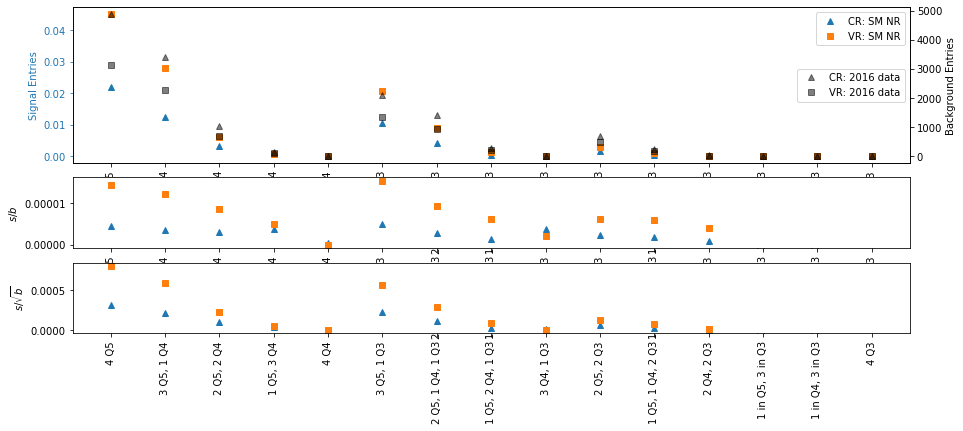

In [16]:
fig = plt.figure(figsize=(15,6))

gs = gridspec.GridSpec(4,1)
ax1 = fig.add_subplot(gs[:2,0])
ax3 = fig.add_subplot(gs[2:3,0],sharex=ax1)
ax4 = fig.add_subplot(gs[3:,0], sharex=ax1)

color='C0'
ax1.plot(quants.loc[('CR',qs_4b[:15]),'SM NR'].values,color=color,label='CR: SM NR',
         linewidth=0,marker='^')
ax1.plot(quants.loc[('VR',qs_4b[:15]),'SM NR'].values,color='C1',label='VR: SM NR',
         linewidth=0,marker='s')
# ax1.plot(quants.loc['SR','SM NR'],color='C6',label='SR: SM NR',
#          linewidth=0,marker='o')

ax2 = ax1.twinx()

plt.plot(quants.loc[('CR',qs_4b[:15]),'2016 data'].values,color='k',label='CR: 2016 data',
         linewidth=0,marker='^',alpha=0.5)
plt.plot(quants.loc[('VR',qs_4b[:15]),'2016 data'].values,color='k',label='VR: 2016 data',
         linewidth=0,marker='s',alpha=0.5)

ax1.legend()
ax2.legend(loc='center right')

ax1.set_ylabel("Signal Entries")
ax1.tick_params(axis='y', colors=color)
ax1.yaxis.label.set_color(color)

ax2.set_ylabel("Background Entries")

# s / b
ax3.plot(quants.loc[('CR',qs_4b[:15]),'SM NR'].values/quants.loc[('CR',qs_4b[:15]),'2016 data'].values,
         color=color, linewidth=0, marker='^')
ax3.plot(quants.loc[('VR',qs_4b[:15]),'SM NR'].values/quants.loc[('VR',qs_4b[:15]),'2016 data'].values,
         color='C1', linewidth=0, marker='s')
ax3.set_ylabel('$s/b$')

# s / sqrt(b)
ax4.plot(quants.loc[('CR',qs_4b[:15]),'SM NR'].values/np.sqrt(quants.loc[('CR',qs_4b[:15]),'2016 data'].values),
         color=color, linewidth=0, marker='^')
ax4.plot(quants.loc[('VR',qs_4b[:15]),'SM NR'].values/np.sqrt(quants.loc[('VR',qs_4b[:15]),'2016 data'].values),
         color='C1', linewidth=0, marker='s')
ax4.set_ylabel('$s/\sqrt{b}$')


# Make the x-axis labels meaningful
for ax in [ax1,ax3]:
    ax.set_xticks(range(15))
    ax.set_xticklabels(['']*15,rotation=90)
    
ax4.set_xticks(range(15))
ax4.set_xticklabels(qs_4b[:15],rotation=90)

plt.show()

Ok, so this plot makes it seem pretty clear that in the CR, $s/b$ is pretty constant, so maybe the reason why my background estimate didn't help the signal efficiency at all was because of this?

Idk lol!

In [51]:
# plt.figure(figsize=(10,5))

# gs = gridspec.GridSpec(4,1)
# ax1 = fig.add_subplot(gs[:2,0])
# ax3 = fig.add_subplot(gs[2:3,0],sharex=ax1)
# ax4 = fig.add_subplot(gs[3:,0], sharex=ax1)

# # CR
# ax1.plot(quants.loc[('CR',qs_4b[:15]),'SM NR'].values,color='C0',label='CR: SM NR',
#          linewidth=0,marker='^')
# ax1.plot(quants.loc[('CR',qs_4b[:15]),'2016 data'].values,color='k',label='CR: 2016 data',
#          linewidth=0,marker='^')

# # VR
# # SR (though I won't have data for this one)

# plt.legend()
# plt.ylabel("Entries")

# # Make the x-axis labels meaningful
# ax = plt.gca()
# ax.set_xticks(range(15))
# ax.set_xticklabels(qs_4b[:15],rotation=90)

# plt.show()

The advantage of filling the table in this way is it's *easy* to make plots!!

**Step 2:** Compare the reweighting variables for each of the trainings separately

**Plan:** I'm going to edit my `cf_hists` function from the PFlow / Topo studies to compare these dfs.


In [18]:
df_60.columns

Index(['run_number', 'event_number', 'mc_sf', 'ntag', 'njets',
       'kinematic_region', 'm_min_dj', 'm_max_dj', 'pairing_score_1',
       'pairing_score_2', 'm_hh', 'pt_hh', 'X_wt', 'm_h1', 'E_h1', 'pT_h1',
       'eta_h1', 'phi_h1', 'm_h2', 'E_h2', 'pT_h2', 'eta_h2', 'phi_h2',
       'm_h1_j1', 'E_h1_j1', 'pT_h1_j1', 'eta_h1_j1', 'phi_h1_j1', 'tag_h1_j1',
       'quantile_h1_j1', 'angle_h1_j1', 'm_h1_j2', 'E_h1_j2', 'pT_h1_j2',
       'eta_h1_j2', 'phi_h1_j2', 'tag_h1_j2', 'quantile_h1_j2', 'angle_h1_j2',
       'm_h2_j1', 'E_h2_j1', 'pT_h2_j1', 'eta_h2_j1', 'phi_h2_j1', 'tag_h2_j1',
       'quantile_h2_j1', 'angle_h2_j1', 'm_h2_j2', 'E_h2_j2', 'pT_h2_j2',
       'eta_h2_j2', 'phi_h2_j2', 'tag_h2_j2', 'quantile_h2_j2', 'angle_h2_j2',
       'pT_4', 'pT_2', 'eta_i', 'dRjj_1', 'dRjj_2', 'NN_d24_weight_CRderiv_16',
       'NN_d24_weight_16', 'w_2b', 'w_2b_VR', 'nQ1', 'nQ2', 'nQ3', 'nQ4',
       'nQ5'],
      dtype='object')

In [3]:
rw_vars = ['njets','pT_4', 'pT_2', 'dRjj_1', 'dRjj_2','eta_i','pt_hh','m_hh']
nBins = [8]+[100]*7
myRanges = [(3.5,12.5),(0,125),(0,200),(0,4),(0,4),(0,2.5),(0,400),(0,600)]

In [4]:
text = '$\mathbf{ATLAS}$ 2016 data Internal\n'
text += 'JAN 2020 MNT prod\n'
text += 'DL1r with BDT pairing'

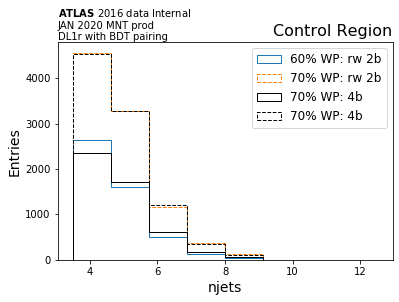

KeyboardInterrupt: 

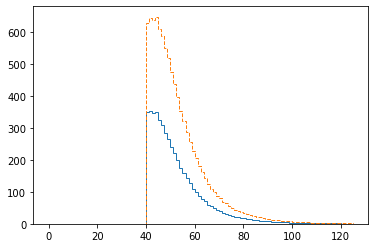

In [5]:
region=2

for density, ylabel, tag in zip([False,True],['','"Normalized" '],['','_norm']):
    for c,n,r in zip(rw_vars,nBins,myRanges):

        plt.figure()
        plt.hist(df_60.loc[(df_60.ntag==2)&(df_60.kinematic_region==region),c], 
                 n, r, color='C0',
                 histtype='step',label='60% WP: rw 2b',density=density,
                 weights=df_60.loc[(df_60.ntag==2)&(df_60.kinematic_region==region),'w_2b'])
        plt.hist(df_70.loc[(df_70.ntag==2)&(df_70.kinematic_region==region),c], 
                 n, r, color='C1',linestyle='--',
                 histtype='step',label='70% WP: rw 2b',density=density,
                 weights=df_70.loc[(df_70.ntag==2)&(df_70.kinematic_region==region),'w_2b'])    

        plt.hist(df_60.loc[(df_60.ntag>=4)&(df_60.kinematic_region==region),c],
                 n,r,color='k',
                 histtype='step',label='70% WP: 4b',density=density)
        plt.hist(df_70.loc[(df_70.ntag>=4)&(df_70.kinematic_region==region),c],
                 n,r,color='k',linestyle='--',
                 histtype='step',label='70% WP: 4b',density=density)

        plt.xlabel(c,fontsize=14)
        plt.ylabel(ylabel+'Entries',fontsize=14)
        plt.legend(fontsize=12)
        plt.title('Control Region',loc='right',fontsize=16)

        ax = plt.gca()
        plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

        plt.savefig(f'figures/PC_studies/{c}_dl1r_60_70{tag}.pdf',bbox_inches='tight')
        plt.show()

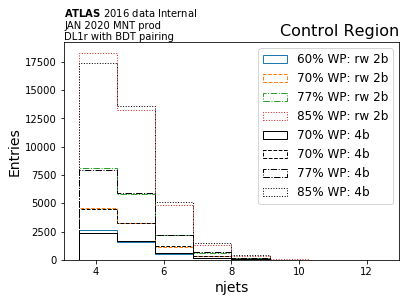

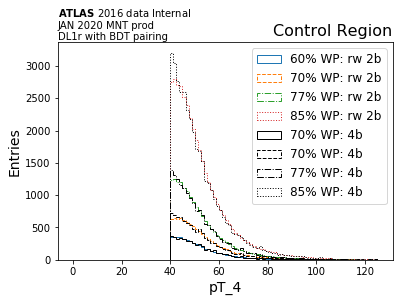

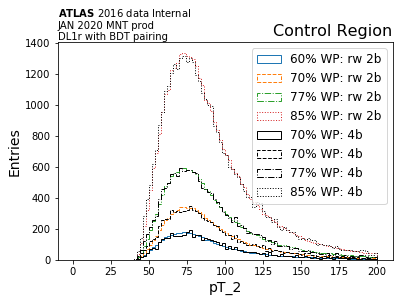

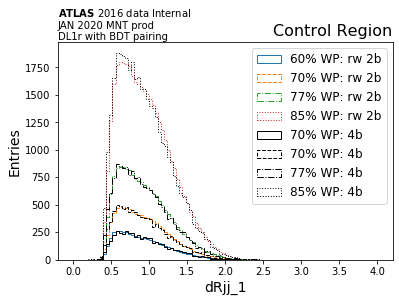

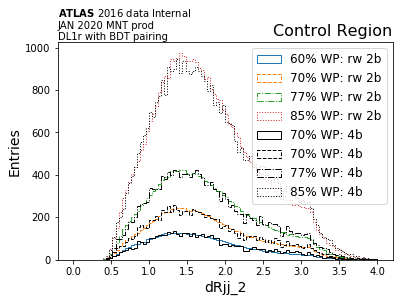

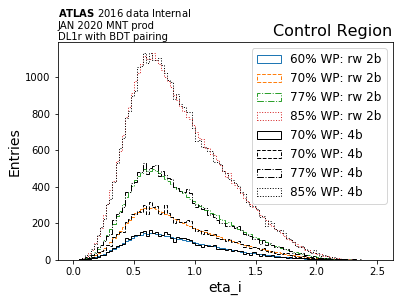

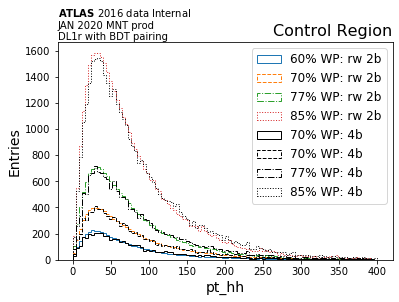

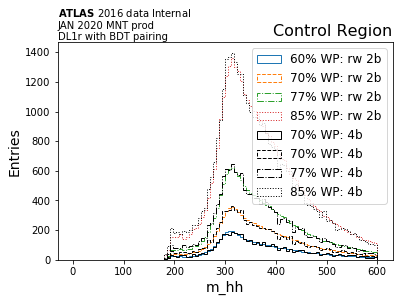

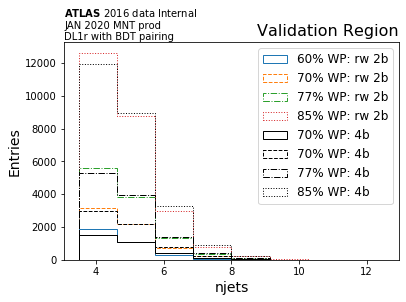

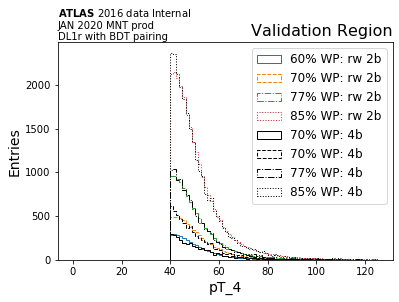

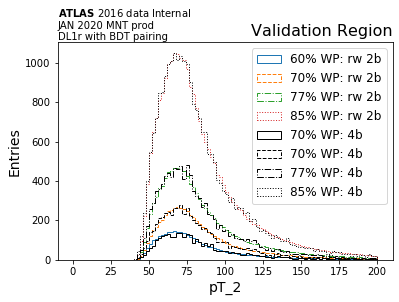

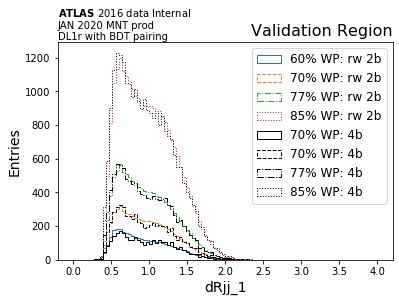

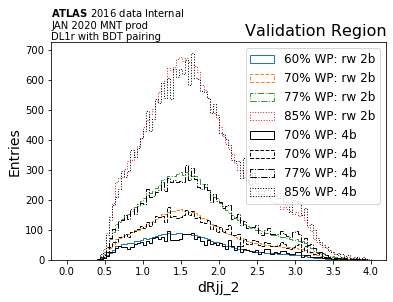

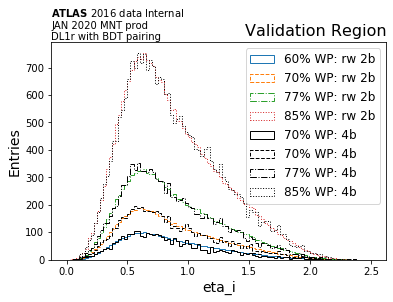

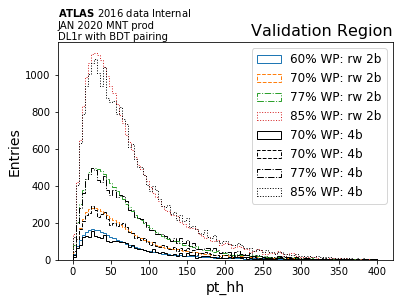

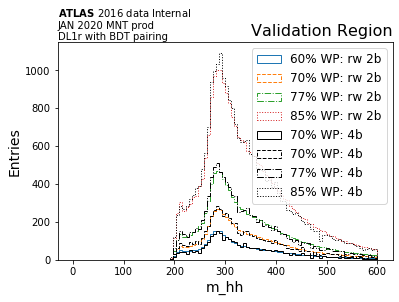

In [14]:
for region, title,tag in zip([2,1],['Control Region','Validation Region'],['CR','VR']):

    for c,n,r in zip(rw_vars,nBins,myRanges):

        plt.figure()
        plt.hist(df_60.loc[(df_60.ntag==2)&(df_60.kinematic_region==region),c], 
                 n, r, color='C0',
                 histtype='step',label='60% WP: rw 2b',density=density,
                 weights=df_60.loc[(df_60.ntag==2)&(df_60.kinematic_region==region),'w_2b'])
        plt.hist(df_70.loc[(df_70.ntag==2)&(df_70.kinematic_region==region),c], 
                 n, r, color='C1',linestyle='--',
                 histtype='step',label='70% WP: rw 2b',density=density,
                 weights=df_70.loc[(df_70.ntag==2)&(df_70.kinematic_region==region),'w_2b'])    

        plt.hist(df_77.loc[(df_77.ntag==2)&(df_77.kinematic_region==region),c], 
                 n, r, color='C2',linestyle='-.',
                 histtype='step',label='77% WP: rw 2b',density=density,
                 weights=df_77.loc[(df_77.ntag==2)&(df_77.kinematic_region==region),'w_2b'])    

        plt.hist(df_85.loc[(df_85.ntag==2)&(df_85.kinematic_region==region),c], 
                 n, r, color='C3',linestyle='dotted',
                 histtype='step',label='85% WP: rw 2b',density=density,
                 weights=df_85.loc[(df_85.ntag==2)&(df_85.kinematic_region==region),'w_2b'])    

        plt.hist(df_60.loc[(df_60.ntag>=4)&(df_60.kinematic_region==region),c],
                 n,r,color='k',
                 histtype='step',label='70% WP: 4b',density=density)
        plt.hist(df_70.loc[(df_70.ntag>=4)&(df_70.kinematic_region==region),c],
                 n,r,color='k',linestyle='--',
                 histtype='step',label='70% WP: 4b',density=density)
        plt.hist(df_77.loc[(df_77.ntag>=4)&(df_77.kinematic_region==region),c],
                 n,r,color='k',linestyle='-.',
                 histtype='step',label='77% WP: 4b',density=density)
        plt.hist(df_85.loc[(df_85.ntag>=4)&(df_85.kinematic_region==region),c],
                 n,r,color='k',linestyle='dotted',
                 histtype='step',label='85% WP: 4b',density=density)
        
        plt.xlabel(c,fontsize=14)
        plt.ylabel(ylabel+'Entries',fontsize=14)
        plt.legend(fontsize=12)
        plt.title(title,loc='right',fontsize=16)

        ax = plt.gca()
        plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

        plt.savefig(f'figures/rw_figs/{c}_dl1r_allWPs_{tag}.pdf',bbox_inches='tight')
        plt.show()
        

**First Observations:** 
- The $n_{jets}$ variable doesn't seem to be as well modeled for the 60% WP - not sure if it could be due to lower stats.
- Moving to a different WP is drastically changing the distributions, which I guess makes sense.
- Looking at the normalized plots, it seems like the distributions are pretty similar between the 60% and the 70% WP, so to first order it seems safe to say that the biggest change between applying these cuts is the yields. *Is there a way I can quantify whether or not this is a valid assumption though*

**Next step:** Use the network trained on 70% WP and eval on the 60% WP sample by adding

Text(0, 1, '$\\mathbf{ATLAS}$ 2016 data Internal\nJAN 2020 MNT prod\nDL1r with BDT pairing')

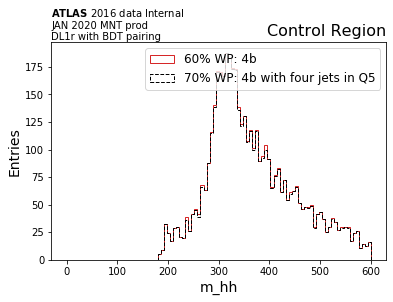

In [23]:
# Sanity check the 4b dists are the same if you apply the 4 nQ4 cut
plt.hist(df_60.loc[(df_60.ntag>=4)&(df_60.kinematic_region==2),'m_hh'],100,(0,600),
         histtype='step',label='60% WP: 4b',color='C3')
plt.hist(df_70.loc[(df_70.ntag>=4) & (df_70.nQ5==4)&(df_70.kinematic_region==2),'m_hh'],100,(0,600),
         histtype='step',label='70% WP: 4b with four jets in Q5',color='k',linestyle='--')

plt.xlabel('m_hh',fontsize=14)
plt.ylabel('Entries',fontsize=14)
plt.legend(fontsize=12)
plt.title('Control Region',loc='right',fontsize=16)

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

#plt.savefig(f'figures/PC_studies/{c}_dl1r_60_70.pdf',bbox_inches='tight')

Ok - I am not *quite* passing this sanity check atm, so I need to figure out *why*.

**Ideas:**
- Is ntag counting the # of $b$-tags with $p_T$ > 40 GeV and $|eta|<2.5$?
- Did Beojean change the sorting order for how we choose the 4 jets?

In [24]:
np.sum(df_60.ntag>=4),np.sum((df_70.ntag>=4) & (df_70.nQ5==4))

(27663, 27405)

Ok, I have slightly more event with the CR_60 df...

In [25]:
np.sum((df_60.ntag>=4)&(df_60.nQ5 !=4))

0

Ok, so it's not an issue with me fucking up the quntile logic.

**Note:** Beojean *changed* how he selects the four jets that makes it difficult for me to make these categories now.
- When the jets are both tagged, they're ordered by the $p_T$
- Ohterwise they're ordered by the tagging decision

So, I think this means that if there are exactly 4 $b$-tagged jets, then this choice of the 4 jets being in the $4^{th}$ quantile will be doing what I want!

Text(0, 1, '$\\mathbf{ATLAS}$ 2016 data Internal\nJAN 2020 MNT prod\nDL1r with BDT pairing')

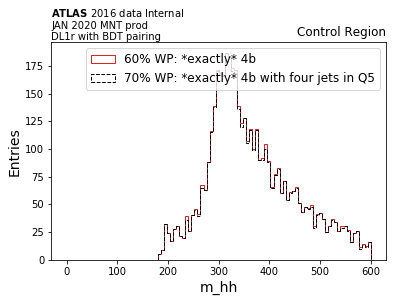

In [27]:
# Sanity check the 4b dists are the same if you apply the 4 nQ4 cut
plt.hist(df_60.loc[(df_60.ntag==4)&(df_60.kinematic_region==2),'m_hh'],100,(0,600),
         histtype='step',label='60% WP: *exactly* 4b',color='C3')
plt.hist(df_70.loc[(df_70.ntag==4) & (df_70.nQ5==4) & (df_70.kinematic_region==2),'m_hh'],100,(0,600),
         histtype='step',label='70% WP: *exactly* 4b with four jets in Q5',color='k',linestyle='--')

plt.xlabel('m_hh',fontsize=14)
plt.ylabel('Entries',fontsize=14)
plt.legend(fontsize=12)
plt.title('Control Region',loc='right')

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

# No need to save this figure, b/c I should have known ahead of time that this wouldn't work!

In [ ]:
np.sum((df_60.ntag>=4) & (df_70.kinematic_region==2)),np.sum((df_70.ntag==4) & (df_70.nQ5==4) & (df_70.kinematic_region==2))

In [ ]:
np.sum((df_60.ntag==4) & (df_70.kinematic_region==2)),np.sum((df_70.ntag==4) & (df_70.nQ5==4) & (df_70.kinematic_region==2))

Ok, so the reason why this doesn't solve the problem is because is because if we have a case where there are more than four jets tagged with the 70% WP and we did not take the four that passed the 60% WP, there would be *no* way that we could recover the 4 jets passing the 60% WP after we've made the NNTs.

But, my solace is that it seems like it's rare that we have a discrepancy betweemn these decisions.

I can come back and make these studies more exact, but these NNTs can still answer some first questions.


In [28]:
### Ok, I think what is most important about this normalization isn't really that I have
# the right mask for N2b, but rather that it's the *same* mask that I use for the plots
# for my background estimate

# Modeling 4 Q5
N4b = np.sum((df_70.nQ5==4)&(df_70.kinematic_region==2))
N2b = np.sum(df_70.loc[(df_70.ntag==2) & (df_70.nQ5==2)&(df_70.kinematic_region==2),'NN_d24_weight_16'])

df_70['w_2b_60'] = df_70['NN_d24_weight_16'] * N4b / N2b 

# Modeling 3 Q5 1 Q4
N4b = np.sum((df_70.nQ5==3)&(df_70.nQ4==1)&(df_70.kinematic_region==2))
N2b = np.sum(df_70.loc[(df_70.ntag==2) & (df_70.nQ5==1) & (df_70.nQ4==1)&(df_70.kinematic_region==2),'NN_d24_weight_16'])

df_70['w_2b_3Q5_1Q4'] = df_70['NN_d24_weight_16'] * N4b / N2b 

# Modeling 2 Q5 2 Q4
N4b = np.sum((df_70.nQ5==2)&(df_70.nQ4==2)&(df_70.kinematic_region==2))
N2b = np.sum(df_70.loc[(df_70.ntag==2) & (df_70.nQ4==2)&(df_70.kinematic_region==2),'NN_d24_weight_16'])

df_70['w_2b_2Q5_2Q4'] = df_70['NN_d24_weight_16'] * N4b / N2b 


In [29]:
N4b

1048

**Question:** How much difference does it make in the distributions depending on which selection of the 2b sample I start from?

I think to *answer* this question, I'll need to compare shapes for the different options for 2b samples in *both* the control and validation regions. (Ideally with a ratio below with error bars, b/c this is kind of what I'm interested in atm.)

Options for splicing the 2b sample:
- for the 2b, have both the bs be in Q5
- for the 

I feel like since the shapes were derived with the inclusive sample, I should use the inclusive sample as well though.

I should also look at the quantile composition of the *background* in the CR, VR, and at least the quantile compostiion in the SR for the "2b" data to see what it looks like!!

In [30]:
twob_sample = pd.DataFrame(0,['CR','VR','SR'],
                           ['2b','2 in Q5','1 Q5 1 Q4','2 in Q4',
                            '(2 in Q5) / 2b','(1 Q5 1 Q4) / 2b','(2 in Q4) / 2b'])

for k,r in zip([2,1,0],['CR','VR','SR']):

    twob_sample.loc[r,'2b'] = np.sum((df_70.ntag==2)&(df_70.kinematic_region==k))
        
    twob_sample.loc[r,'2 in Q5'] = np.sum((df_70.ntag==2)&(df_70.nQ5==2)&(df_70.kinematic_region==k))
    twob_sample.loc[r,'1 Q5 1 Q4'] = np.sum((df_70.ntag==2)&(df_70.nQ5==1)&(df_70.nQ4==1)&(df_70.kinematic_region==k))
    twob_sample.loc[r,'2 in Q4'] = np.sum((df_70.ntag==2)&(df_70.nQ4==2)&(df_70.kinematic_region==k))
    
    twob_sample.loc[r,'(2 in Q5) / 2b'] = twob_sample.loc[r,'2 in Q5'] /  twob_sample.loc[r,'2b']
    twob_sample.loc[r,'(1 Q5 1 Q4) / 2b'] = twob_sample.loc[r,'1 Q5 1 Q4'] /  twob_sample.loc[r,'2b']
    twob_sample.loc[r,'(2 in Q4) / 2b'] = twob_sample.loc[r,'2 in Q4'] /  twob_sample.loc[r,'2b']
    
twob_sample

2b  2 in Q5  1 Q5 1 Q4  2 in Q4  (2 in Q5) / 2b  (1 Q5 1 Q4) / 2b  \
CR  1616993  1319105     319634    38333        0.815777          0.197672   
VR  1084817   885463     213339    25374        0.816233          0.196659   
SR   894086   703252     175577    15257        0.786560          0.196376   

    (2 in Q4) / 2b  
CR        0.023706  
VR        0.023390  
SR        0.017064

**Lesson:** About 80% of our 2b w/ 70% WP sample is taken up by the (2 in Q5) category, so in this sense it makes sense why it was so easy to model the kinematics of the 60% WP w/ the 2b sample trained w/ the 70% WP.

So I really need to check the modelling in the CR and VR for the 3 Q5 1 Q4 and 2 Q5 2 Q4 categories!!

In [43]:
nBins

[8, 100, 100, 100, 100, 100, 100, 100]

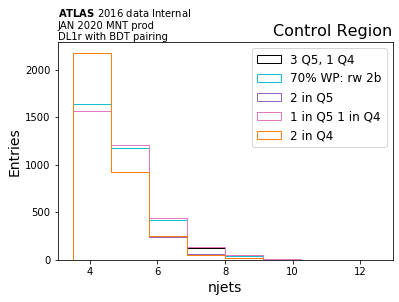

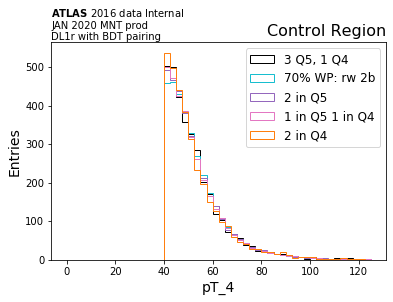

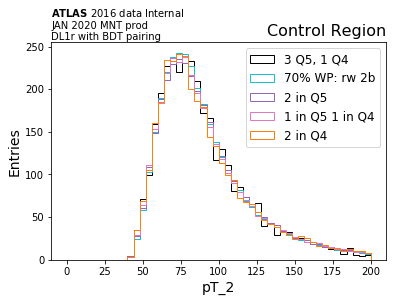

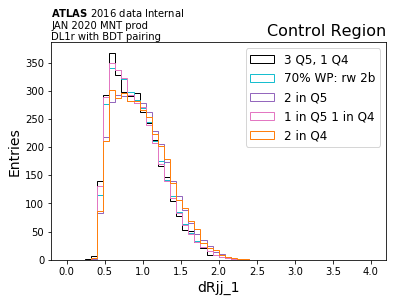

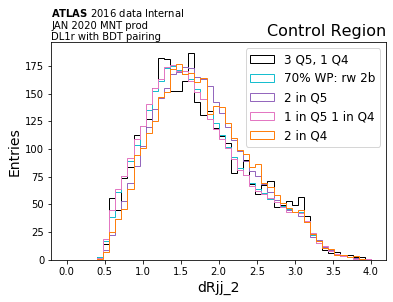

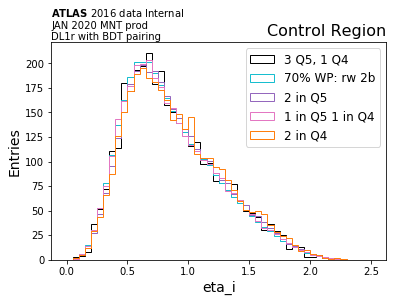

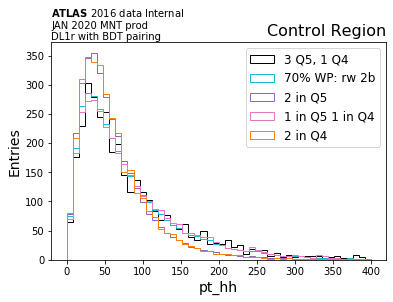

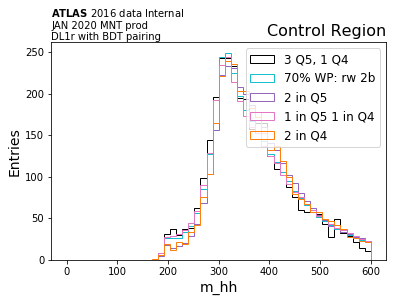

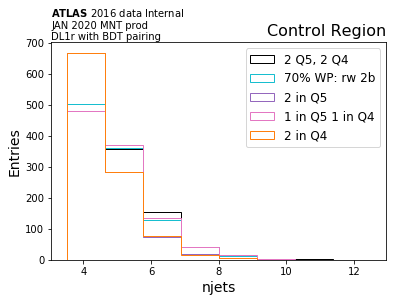

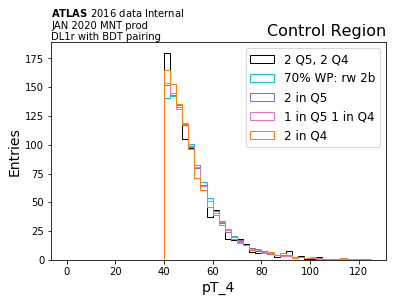

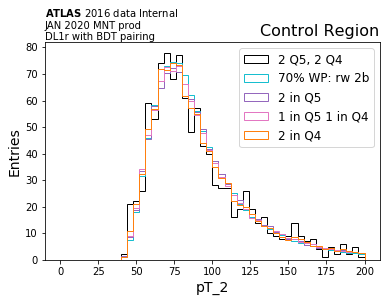

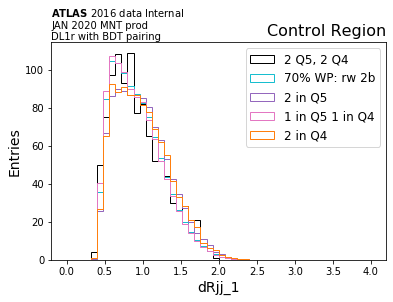

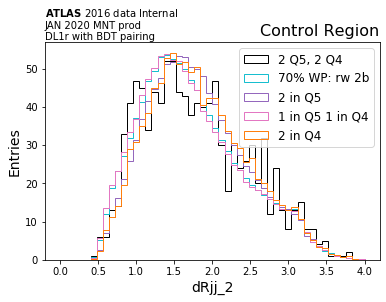

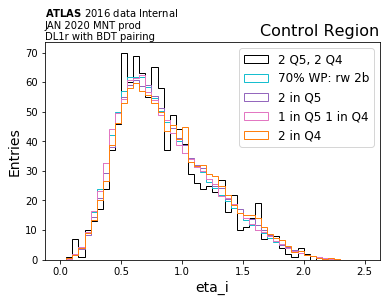

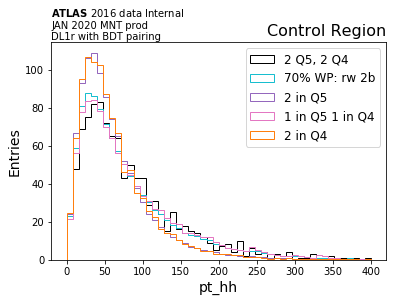

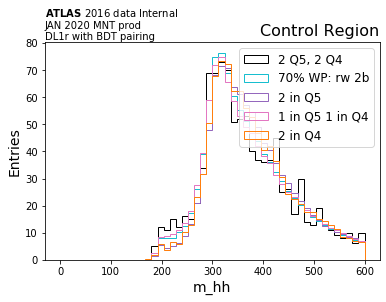

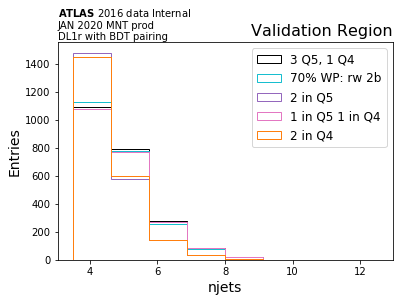

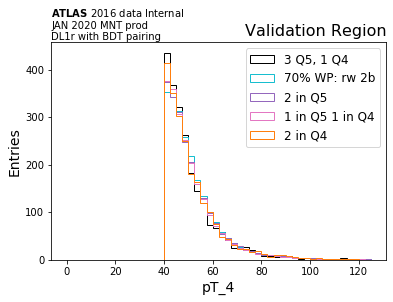

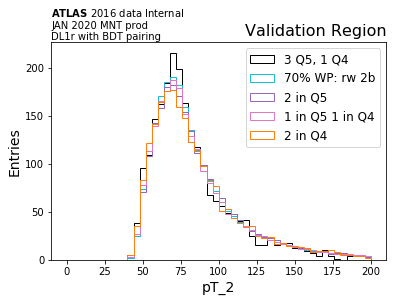

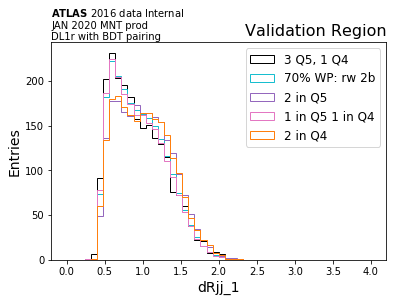

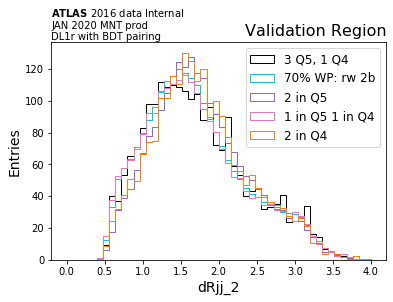

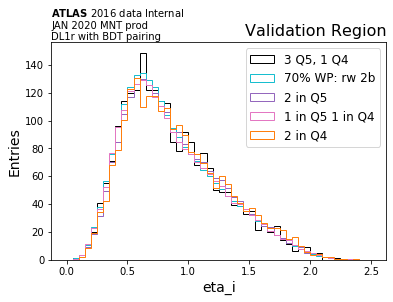

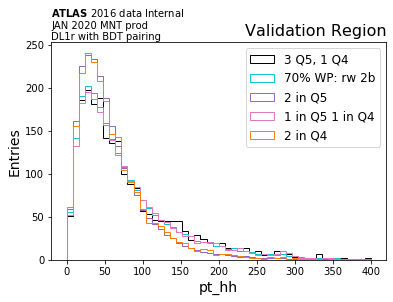

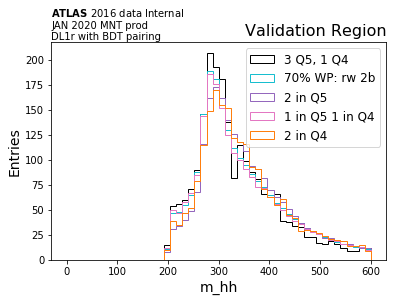

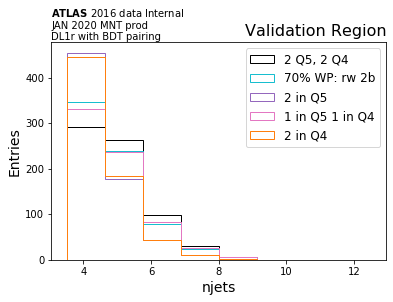

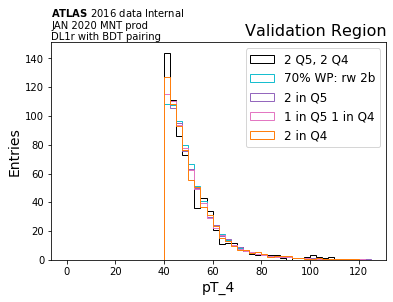

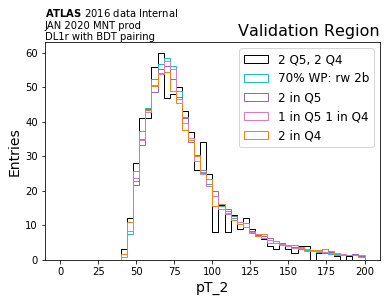

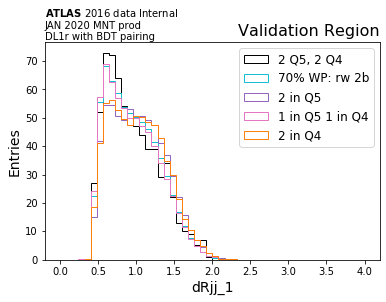

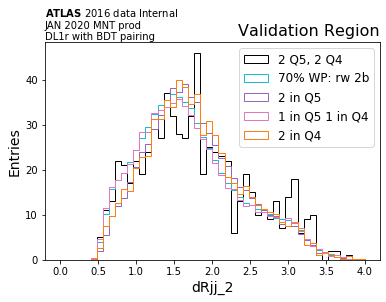

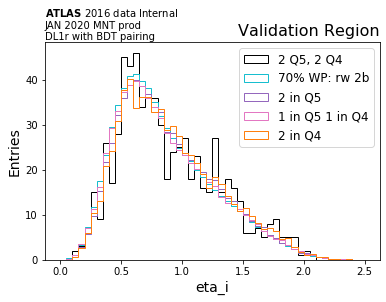

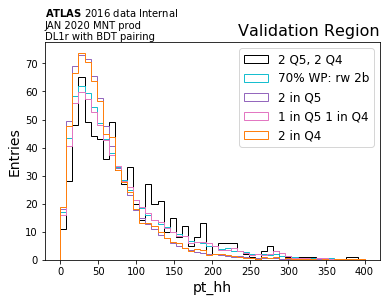

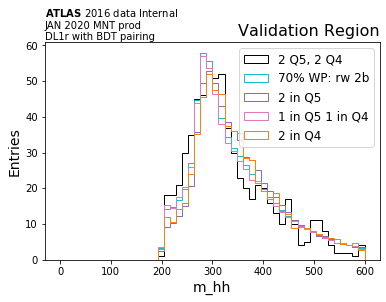

In [44]:
for region,title in zip([2,1],['Control Region','Validation Region']):

    for mask_4b, tag in zip([(df_70.nQ5==3)&(df_70.nQ4==1),(df_70.nQ5==2)&(df_70.nQ4==2)],['3 Q5, 1 Q4','2 Q5, 2 Q4']):

        N4b = np.sum(mask_4b & (df_70.kinematic_region==2))

        for c,n,r in zip(rw_vars,[8]+[50]*7,myRanges):

            plt.figure()

            plt.hist(df_70.loc[mask_4b&(df_70.kinematic_region==region),c],
                     n, r, color='k', histtype='step', label=tag)

            # 2b
            mask_2b = (df_70.ntag==2)
            N2b = np.sum(df_70.loc[mask_2b & (df_70.kinematic_region==2),'NN_d24_weight_16'])
            N2bTo4b = N4b / N2b 
            plt.hist(df_70.loc[mask_2b&(df_70.kinematic_region==region),c], 
                     n, r, color='C9',histtype='step',label='70% WP: rw 2b',
                     weights=N2bTo4b*df_70.loc[mask_2b & (df_70.kinematic_region==region),'NN_d24_weight_16'])    


            # 2 in Q5
            mask_2b = (df_70.nQ5==2)
            N2b = np.sum(df_70.loc[mask_2b & (df_70.kinematic_region==2),'NN_d24_weight_16'])
            N2bTo4b = N4b / N2b 
            plt.hist(df_70.loc[mask_2b&(df_70.kinematic_region==region),c], 
                     n, r, color='C4',histtype='step',label='2 in Q5',
                     weights=N2bTo4b*df_70.loc[mask_2b & (df_70.kinematic_region==region),'NN_d24_weight_16'])  

            # 1 in Q5 1 in Q4
            mask_2b = (df_70.nQ5==1) & (df_70.nQ4==1)
            N2b = np.sum(df_70.loc[mask_2b & (df_70.kinematic_region==2),'NN_d24_weight_16'])
            N2bTo4b = N4b / N2b 
            plt.hist(df_70.loc[mask_2b&(df_70.kinematic_region==region),c], 
                     n, r, color='C6',histtype='step',label='1 in Q5 1 in Q4',
                     weights=N2bTo4b*df_70.loc[mask_2b & (df_70.kinematic_region==region),'NN_d24_weight_16'])

            # 2 in Q4
            mask_2b = (df_70.nQ4==2)
            N2b = np.sum(df_70.loc[mask_2b & (df_70.kinematic_region==2),'NN_d24_weight_16'])
            N2bTo4b = N4b / N2b 
            plt.hist(df_70.loc[mask_2b&(df_70.kinematic_region==region),c], 
                     n, r, color='C1',histtype='step',label='2 in Q4',
                     weights=N2bTo4b*df_70.loc[mask_2b & (df_70.kinematic_region==region),'NN_d24_weight_16'])


            plt.xlabel(c,fontsize=14)
            plt.ylabel('Entries',fontsize=14)
            plt.legend(fontsize=12)
            plt.title(title,loc='right',fontsize=16)

            ax = plt.gca()
            plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

            #plt.savefig(f'figures/PC_studies/{c}_dl1r_60_70{tag}.pdf',bbox_inches='tight')
            plt.show()

**Observations:**
- I thought purple and cyan should be doing pretty close to the same thing, but this doesn't appear to be the case in fact!
- It looks like pink and cyan are more often showing a similar trend
- The yields seem to just be *off* in the validation region, but I'm not sure if this means I fucked something up along the way, or if this could be the reason why I wasn't seeing any improvement in the limits.

*Honestly, idk what my next step is from here!*


In [33]:
# for c,n,r in zip(rw_vars,nBins,myRanges):
    
#     plt.figure()
#     plt.hist(CR_60.loc[CR_60.ntag==2,c], n, r, color='C0',
#              histtype='step',label='60% WP: rw 2b',
#              weights=CR_60.loc[CR_60.ntag==2,'w_2b'])
#     plt.hist(CR_70.loc[(CR_70.ntag==2) & (CR_70.nQ5==2),c], n, r, color='C1',linestyle='--',
#              histtype='step',label='70% WP: rw 2b',
#              weights=CR_70.loc[(CR_70.ntag==2) & (CR_70.nQ5==2),'w_2b_60'])    
    
#     plt.hist(CR_60.loc[CR_60.ntag>=4,c],n,r,histtype='step',label='70% WP: 4b',color='k')
#     plt.hist(CR_70.loc[(CR_70.ntag>=4)&(CR_70.nQ5==4),c],n,r,histtype='step',label='70% WP: 4b',color='k',linestyle='--')
    
#     plt.xlabel(c,fontsize=14)
#     plt.ylabel('Entries',fontsize=14)
#     plt.legend(fontsize=12)
#     plt.title('Control Region',loc='right',fontsize=16)
    
#     ax = plt.gca()
#     plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)
    
#     #plt.savefig(f'figures/PC_studies/{c}_dl1r_60_70.pdf',bbox_inches='tight')
#     plt.show()

With the updated normalization, it doesn't look that bad, but the shoulder doesn't appear to be adequately modeled atm.

However, looking at the "Normalized entries" plot that I made a few cells ago, it seems to just be an issue with the reweighting for the 70% working point more than anything else, so I think I can call this good enough for a first sensitivity estimate.

**Plan:** For these PC studies, I've been discovering that we have a lot more options to play with, which also opens the door for using more similar background regions for the reweighting as well!

**Option 1:** Take the sample where you've been looking into the b-tagging at the 60% WP, and see if you put the 2 b-tags in the same HC how the distribution looks. 

It might be safest to look at these distributions in the CR, although Fig 10 of the booted int note is doing something else. 

In [ ]:
# from plotting import cf_2b_same_HC
# nbi=25
# cf_2b_same_HC(CR_60, nbi=nbi, dataText=text, title='Control Region: 60% WP')
# #figDir='figures/vec_min_dRjj_h1/HC2b_data16',stats=True) 

Ok, the modelling is *even worse* than before, so I think what I'll need to do now is to *define a strategy* for how to splice up our 2b sample to define a reweighting!

**Question:** Could discrepancies be due to $t\bar{t}$? Or what is the impact of $t\bar{t}$ on these distributions?

Ok, I. could download the $t\bar{t}$ samples and make NNTs to check this hypothesis, but $t\bar{t}$ should account for only 5% of our background, so it couldn't have such a large effect in our inclusive distributions that I'm seeing above.


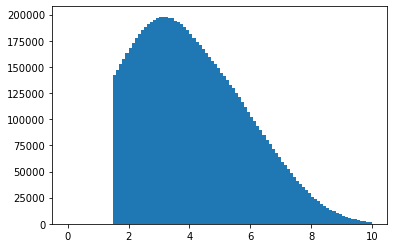

In [34]:
plt.hist(df_60.X_wt,100,(0,10))
plt.show()

**Getting closer to these categorizations and limits**

I want to overlay the $m_{hh}$ distributions for these three SRs and their background estimates!

In [35]:
edges = np.array([150, 250, 262, 275, 288, 302, 317, 332, 348, 365, 383, 402, 422, 443, 465, 488, 512, 
                  537, 563, 591, 620, 651, 683, 717, 752, 789, 828, 869, 912, 957,1004, 1054, 1106, 1161, 
                  1219, 1279, 1342, 1409, 1479, 1552, 1629, 1710, 1795, 1884, 1978, 2076])
x = 0.5*(edges[:-1]+edges[1:])

In [ ]:
w2b

In [ ]:
np.max(CR_70.loc[bmask,w2b])

4 Q5 : s= 2.485697239850395 , b= 2653.732863185297


/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


3 Q5 1 Q4 : s= 1.5713993700975555 , b= 1825.0555396422046
2 Q5 2Q4 : s= 0.37012331573377794 , b= 564.7038514354311


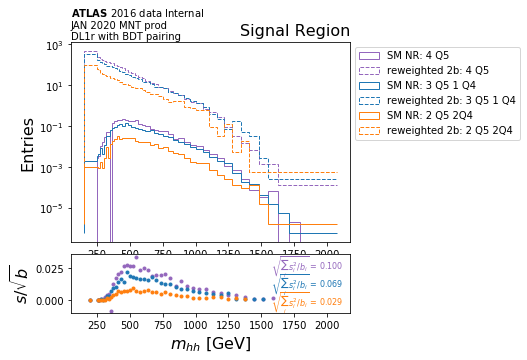

In [40]:
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(4,1)
ax1 = fig.add_subplot(gs[:3,0])
ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)

# Loop through the options (using the bdt pairing)
for smask,bmask,w2b,color,ytxt,label in zip([(sig.nQ5==4), (sig.nQ5==3)&(sig.nQ4==1), (sig.nQ5==2)&(sig.nQ4==2)],
                                            [(df_70.ntag==2)&(df_70.nQ5==2),
                                             (df_70.ntag==2)&(df_70.nQ5==1)&(df_70.nQ4==1), 
                                             (df_70.ntag==2)&(df_70.nQ4==2)],
                                            ['w_2b_60','w_2b_3Q5_1Q4','w_2b_2Q5_2Q4'],
                                            ['C4','C0','C1'],[1,.7,.4],['4 Q5','3 Q5 1 Q4','2 Q5 2Q4']):

    # signal
    s,_,_ = ax1.hist(sig.loc[smask,'m_hh'],
                     edges,color=color,histtype='step',log=True,
                     label="SM NR: "+label,ls='-',
                     weights=sig.loc[smask,'mc_sf'])

    # background
    b,_,_ = ax1.hist(df_70.loc[bmask&(df_70.kinematic_region==0),'m_hh'],
                     edges,color=color,histtype='step',log=True,
                     label="reweighted 2b: "+label,ls='--',
                     weights=df_70.loc[bmask&(df_70.kinematic_region==0),w2b])

    print(label,": s=",np.sum(s),", b=",np.sum(b))
    
    # Significance (it probably would be a good idea to put mv2 and dl1r in different subpanels)
    ax2.plot(x,s/np.sqrt(b),marker='.',color=color,linewidth=0)

    # Calculate the limit
    sigText = '$\sqrt{\sum_i{s_i^2 / b_i}}$ = '

    ax2.text(.975,ytxt,sigText+'{:.3f}'.format(np.sqrt(np.sum(s[b!=0]**2 / b[b!=0]))),
             ha='right',va='top',fontsize=8,
             transform=ax2.transAxes,color=color)

# Text per subfig
ax2.set_ylabel('$s / \sqrt{b}$',fontsize=16)

    
# Make the plot pretty
ax2.set_xlabel('$m_{hh}$ [GeV]',fontsize=16)
ax1.set_ylabel('Entries', fontsize=16)
ax1.set_title('Signal Region', loc='right',fontsize=16)
ax1.legend(bbox_to_anchor=(1,1))

ax1.text(0,1,text,ha='left',va='bottom',transform=ax1.transAxes)

#plt.savefig('figures/m_hh_SR_m.pdf',bbox_inches='tight')

plt.show()

**I'll need to remember to apply my `hackHistogram` function before calculating the limit!!!**

In [42]:
np.sqrt(.1**2+.069**2+.029**2)

0.12490796611905905

Ok, so this means we approximately didn't gain *anything* by this categorization!

Maybe I should double check this w/ Rafael? Does this make sense that this background is *exactly* the same between signal and qcd background???

**Follow-up questions:** 
- Could we gain more from PC if we also included the $\Delta \eta$ or $\cos \theta^*$ in the categorization?
- Would cutting tighter when we have looser b-tags help us gain more by this looser categorization?
- Could this feature of not gaining anything with this categorization just be due to the fact that I assumed the event shapes were all the same between these exclusive categories, and this washes our the discrepancies that I was trying to capture?

**I might just need to suck it up and re-derive some background estimates!**

Or, could I use the PC bins that are super close to get the shape, and then scale the yields with the sideband?

I.e, use 1 Q5 3 Q4 to model 3 Q5 1 Q4 and use 4 Q4 to model 2 Q5 2 Q4?

**Check the reweighting variables (and $m_{hh}$) in the CR**


In [ ]:
region=2
density=True
ylabel='"Normalized" '
#for density, ylabel, tag in zip([False,True],['','"Normalized" '],['','_norm']):

for c,n,r in zip(rw_vars,nBins,myRanges):

    plt.figure()
    
    for mask, label in zip([(df_70.nQ5==3)&(df_70.nQ4==1),(df_70.nQ5==2)&(df_70.nQ4==2),
                            (df_70.nQ5==1)&(df_70.nQ4==3),(df_70.nQ4==4)],
                           ['3 Q5 1 Q4','2 Q5 2 Q4','1 Q5 2 Q4','4 Q4']):
    

        plt.hist(df_70.loc[mask&(df_70.kinematic_region==region),c], 
                 n, r, #color='C1',linestyle='--',
                 histtype='step',label=label,density=density) 
    
    plt.xlabel(c,fontsize=14)
    plt.ylabel(ylabel+'Entries',fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Control Region',loc='right',fontsize=16)

    ax = plt.gca()
    plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

    #plt.savefig(f'figures/PC_studies/{c}_dl1r_60_70{tag}.pdf',bbox_inches='tight')
    plt.show()

Ok, first off, it seems like this was not a great idea. In terms of shapes, these are pretty *big* differences, and it *doesn't* seem like we're really gaining anything by cutting out the 1 Q5 2 Q4 events with data.


**Next:** Let's see if we can gain *more* than 10% by splitting up the regions that Todd was looking at into separate categories for expanding our SR to the 77% WP and then expanding again to the 85% WP.

Acutally - this is not the next step, I should rederive limits, because I'm honestly surprised I didn't gain anything, because if our background is actually dominated by $g\rightarrow b\bar{b}$, we wouldn't expect to do better by tightening the b-tagging decision.

**Look at the overall yields determining the composition of the sample**

In [47]:
twob_77 = pd.DataFrame(0,['CR','VR','SR'],
                       ['2b','2 Q5','1 Q5 1 Q4','1 Q5 1 Q3','2 Q4','1 Q4 1 Q3','2 Q3',
                        '(2 Q5)/2b','(1 Q5 1 Q4)/2b','(1 Q5 1 Q3)/2b','(2 Q4)/2b','(1 Q4 1 Q3)/2b','(2 Q3)/2b'])

for k,r in zip([2,1,0],['CR','VR','SR']):

    mask = (df_77.ntag==2) & (df_77.kinematic_region==k)
    
    twob_77.loc[r,'2b'] = np.sum(mask)
        
    twob_77.loc[r,'2 Q5'] = np.sum((df_77.nQ5==2)&mask)
    twob_77.loc[r,'1 Q5 1 Q4'] = np.sum((df_77.nQ5==1)&(df_77.nQ4==1)&mask)
    twob_77.loc[r,'1 Q5 1 Q3'] = np.sum((df_77.nQ5==1)&(df_77.nQ3==1)&mask)
    twob_77.loc[r,'2 Q4'] = np.sum((df_77.nQ4==2)&mask)
    twob_77.loc[r,'1 Q4 1 Q3'] = np.sum((df_77.nQ4==1)&(df_77.nQ3==1)&mask)
    twob_77.loc[r,'2 Q3'] = np.sum((df_77.nQ3==2)&mask)
    
    twob_77.loc[r,'(2 Q5)/2b'] = twob_77.loc[r,'2 Q5'] / twob_77.loc[r,'2b']
    twob_77.loc[r,'(1 Q5 1 Q4)/2b'] = twob_77.loc[r,'1 Q5 1 Q4'] / twob_77.loc[r,'2b']
    twob_77.loc[r,'(1 Q5 1 Q3)/2b'] = twob_77.loc[r,'1 Q5 1 Q3'] / twob_77.loc[r,'2b']
    twob_77.loc[r,'(2 Q4)/2b'] = twob_77.loc[r,'2 Q4'] / twob_77.loc[r,'2b']
    twob_77.loc[r,'(1 Q4 1 Q3)/2b'] = twob_77.loc[r,'1 Q4 1 Q3'] / twob_77.loc[r,'2b']
    twob_77.loc[r,'(2 Q3)/2b'] = twob_77.loc[r,'2 Q3'] / twob_77.loc[r,'2b']
    
twob_77

2b     2 Q5  1 Q5 1 Q4  1 Q5 1 Q3   2 Q4  1 Q4 1 Q3  2 Q3  (2 Q5)/2b  \
CR  1560376  1217455     301314      13449  25582       2329   247   0.780232   
VR  1046982   818207     200908       9111  17001       1552   203   0.781491   
SR   863476   674909     165673       7328  14166       1231   169   0.781619   

    (1 Q5 1 Q4)/2b  (1 Q5 1 Q3)/2b  (2 Q4)/2b  (1 Q4 1 Q3)/2b  (2 Q3)/2b  
CR        0.193103        0.008619   0.016395        0.001493   0.000158  
VR        0.191893        0.008702   0.016238        0.001482   0.000194  
SR        0.191868        0.008487   0.016406        0.001426   0.000196

**Determine how best to model these regions**

It seems like the stats will only be relevant in the following categories:
- 2 Q5
- 1 Q5 1 Q4
- 2 Q4
- 1 Q5 1 Q3


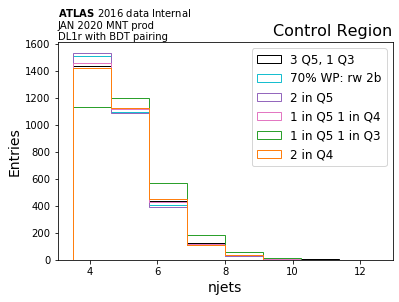

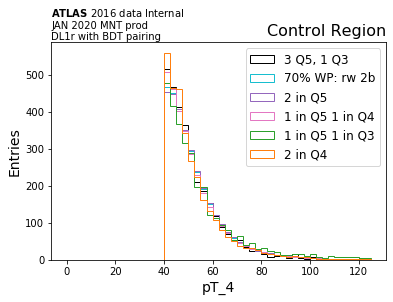

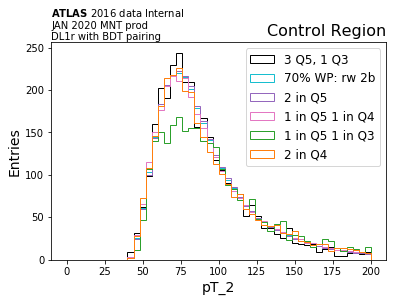

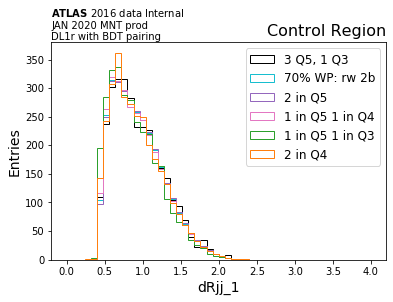

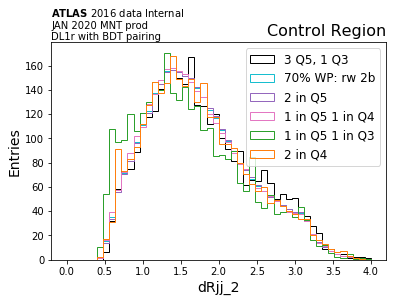

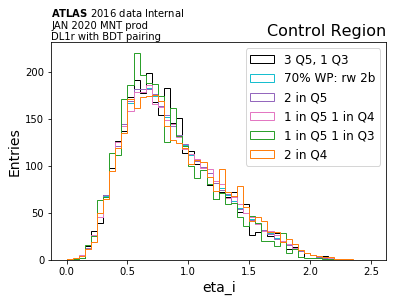

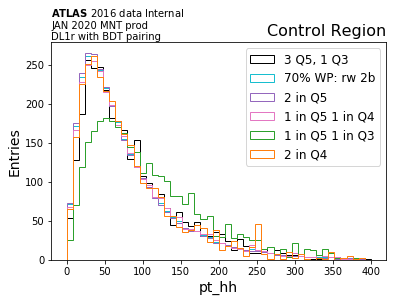

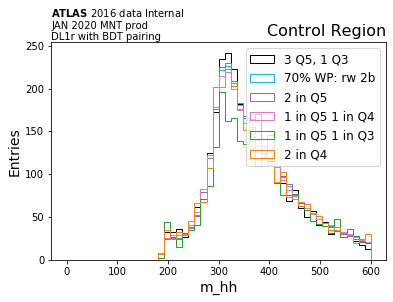

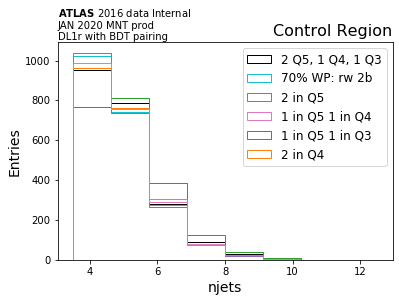

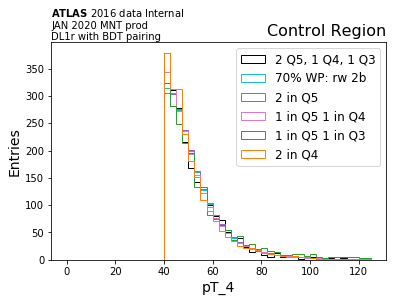

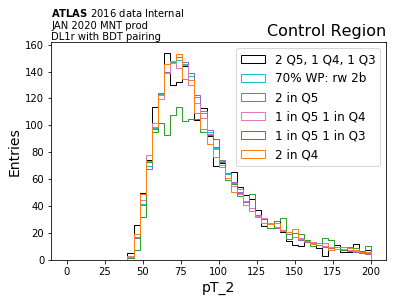

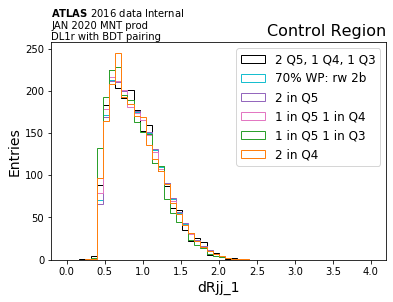

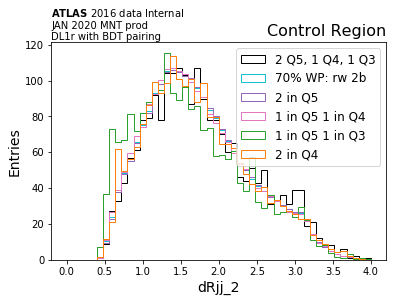

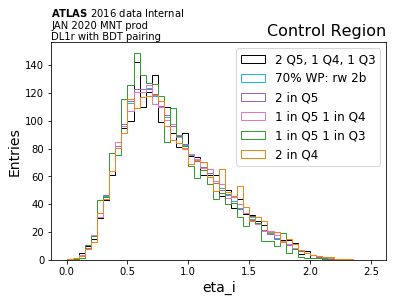

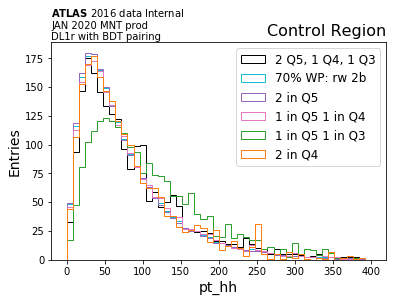

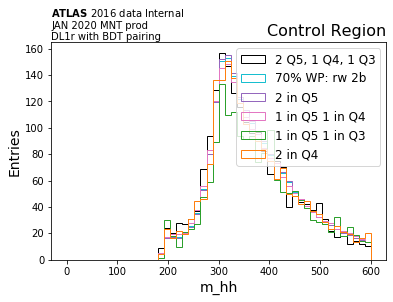

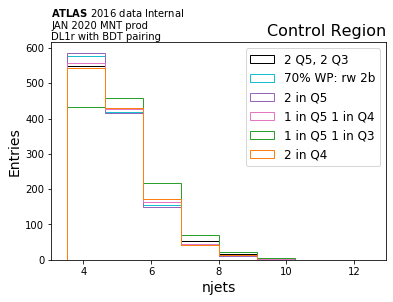

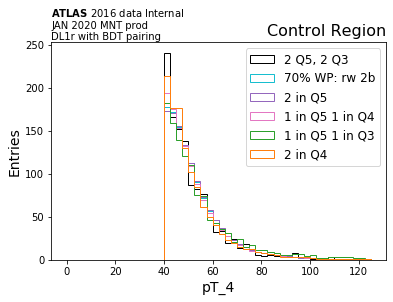

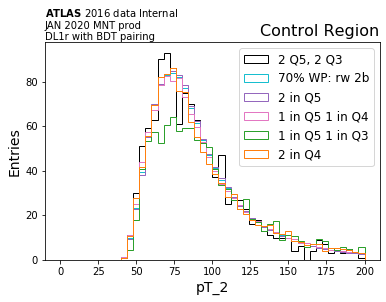

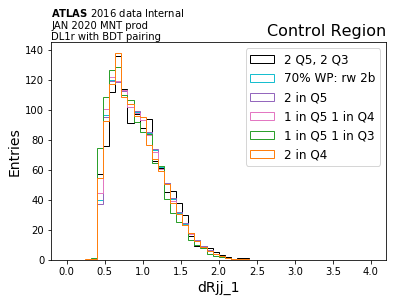

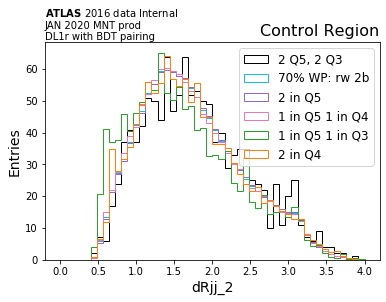

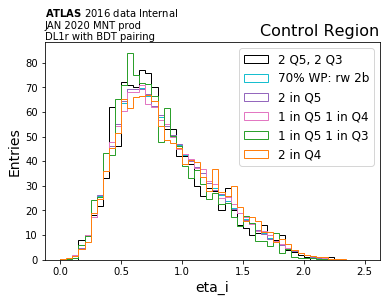

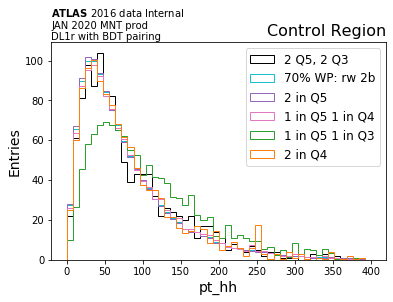

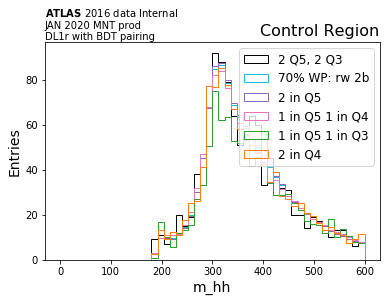

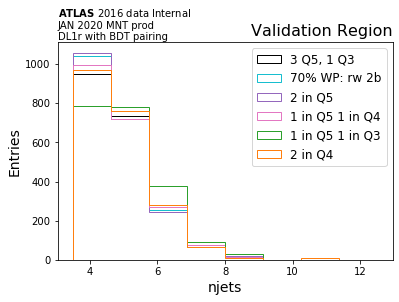

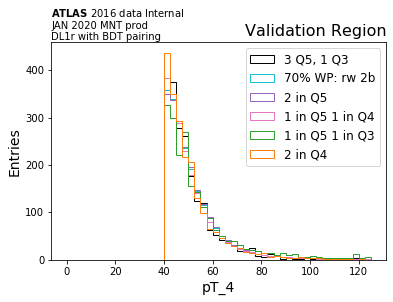

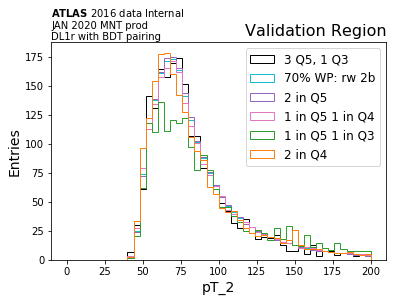

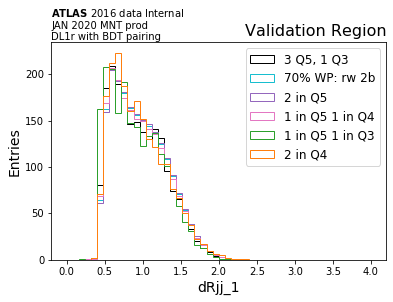

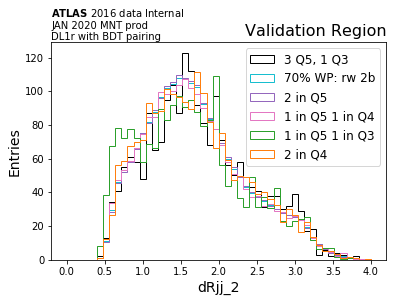

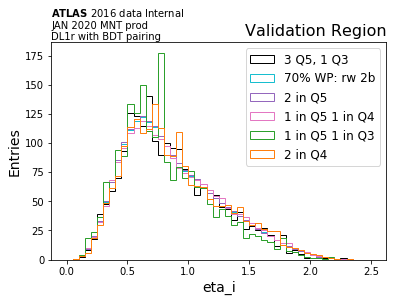

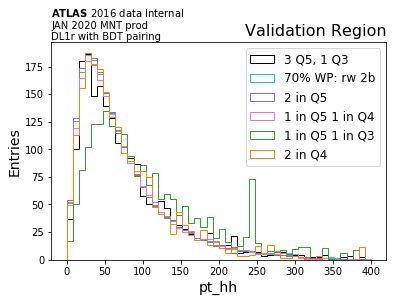

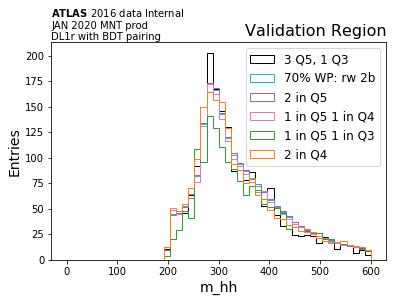

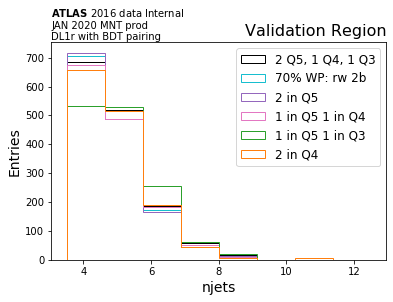

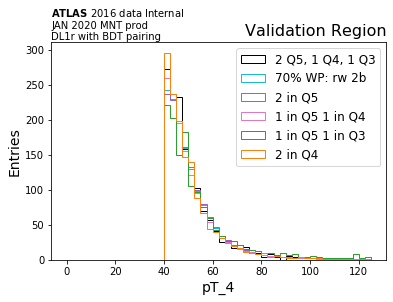

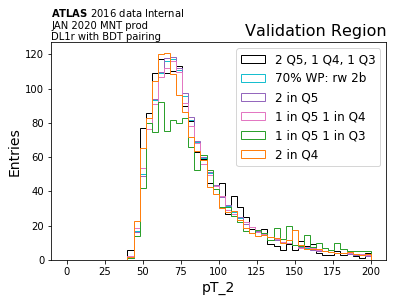

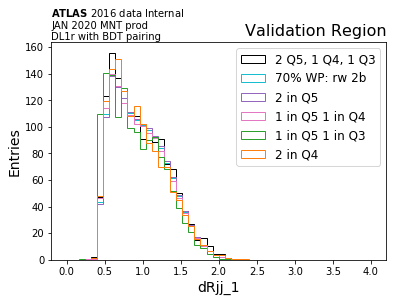

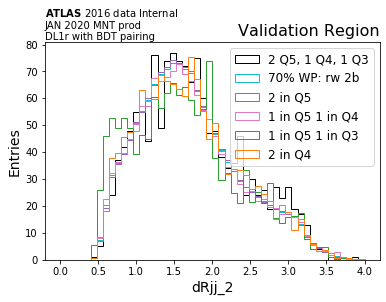

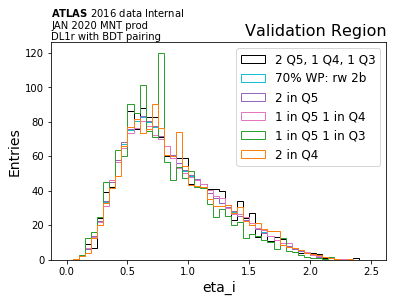

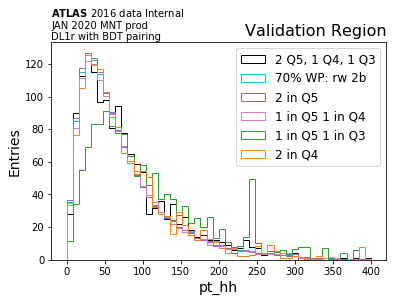

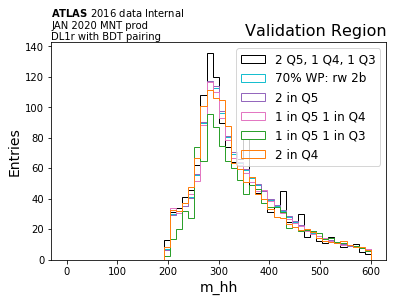

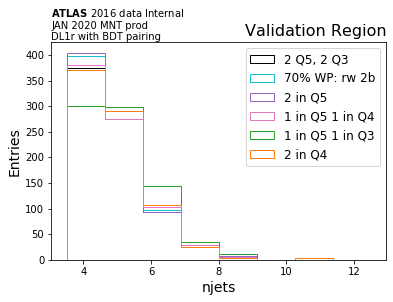

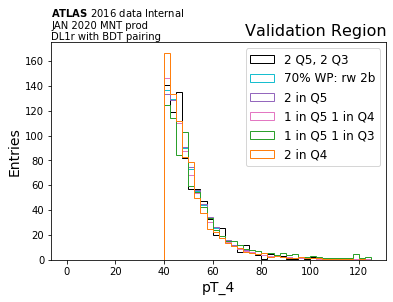

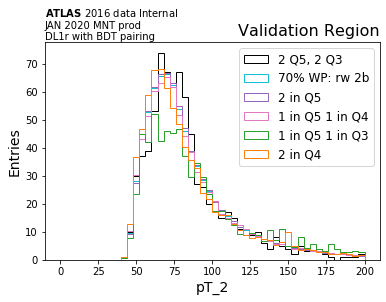

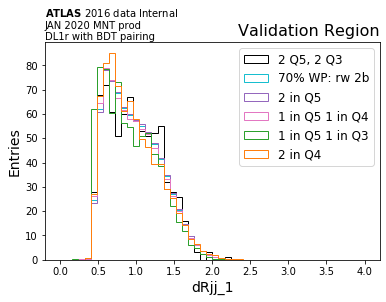

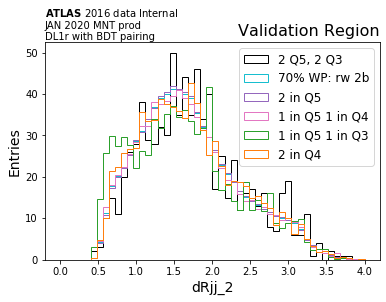

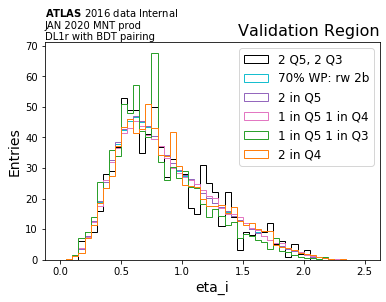

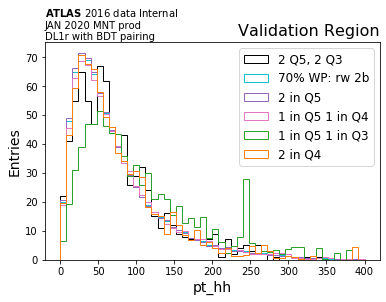

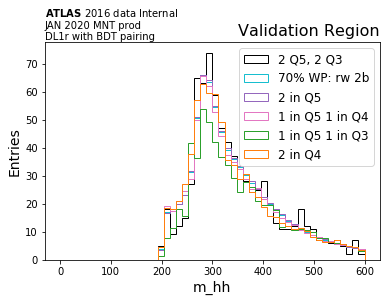

In [53]:
for region,title in zip([2,1],['Control Region','Validation Region']):

    for mask_4b, tag in zip([(df_77.nQ5==3)&(df_77.nQ3==1),
                             (df_77.nQ5==2)&(df_77.nQ4==1)&(df_77.nQ3==1),
                             (df_77.nQ5==2)&(df_77.nQ3==2)],
                            ['3 Q5, 1 Q3','2 Q5, 1 Q4, 1 Q3','2 Q5, 2 Q3']):

        N4b = np.sum(mask_4b & (df_77.kinematic_region==2))

        for c,n,r in zip(rw_vars,[8]+[50]*7,myRanges):

            plt.figure()

            plt.hist(df_77.loc[mask_4b&(df_77.kinematic_region==region),c],
                     n, r, color='k', histtype='step', label=tag)

            # 2b
            mask_2b = (df_77.ntag==2)
            N2b = np.sum(df_77.loc[mask_2b & (df_77.kinematic_region==2),'NN_d24_weight_16'])
            N2bTo4b = N4b / N2b 
            plt.hist(df_77.loc[mask_2b&(df_77.kinematic_region==region),c], 
                     n, r, color='C9',histtype='step',label='77% WP: rw 2b',
                     weights=N2bTo4b*df_77.loc[mask_2b & (df_77.kinematic_region==region),'NN_d24_weight_16'])    

            # 2 in Q5
            mask_2b = (df_77.nQ5==2) & (df_77.ntag==2)
            N2b = np.sum(df_77.loc[mask_2b & (df_77.kinematic_region==2),'NN_d24_weight_16'])
            N2bTo4b = N4b / N2b 
            plt.hist(df_77.loc[mask_2b&(df_77.kinematic_region==region),c], 
                     n, r, color='C4',histtype='step',label='2 in Q5',
                     weights=N2bTo4b*df_77.loc[mask_2b & (df_77.kinematic_region==region),'NN_d24_weight_16'])  

            # 1 in Q5 1 in Q4
            mask_2b = (df_77.nQ5==1) & (df_77.nQ4==1) & (df_77.ntag==2)
            N2b = np.sum(df_77.loc[mask_2b & (df_77.kinematic_region==2),'NN_d24_weight_16'])
            N2bTo4b = N4b / N2b 
            plt.hist(df_77.loc[mask_2b&(df_77.kinematic_region==region),c], 
                     n, r, color='C6',histtype='step',label='1 in Q5 1 in Q4',
                     weights=N2bTo4b*df_77.loc[mask_2b & (df_77.kinematic_region==region),'NN_d24_weight_16'])

            # 1 in Q5 1 in Q3
            mask_2b = (df_77.nQ5==1) & (df_77.nQ3==1) & (df_77.ntag==2)
            N2b = np.sum(df_77.loc[mask_2b & (df_77.kinematic_region==2),'NN_d24_weight_16'])
            N2bTo4b = N4b / N2b 
            plt.hist(df_77.loc[mask_2b&(df_77.kinematic_region==region),c], 
                     n, r, color='C2',histtype='step',label='1 in Q5 1 in Q3',
                     weights=N2bTo4b*df_77.loc[mask_2b & (df_77.kinematic_region==region),'NN_d24_weight_16'])

            # 2 in Q4
            mask_2b = (df_77.nQ4==2) & (df_77.ntag==2)
            N2b = np.sum(df_77.loc[mask_2b & (df_77.kinematic_region==2),'NN_d24_weight_16'])
            N2bTo4b = N4b / N2b 
            plt.hist(df_77.loc[mask_2b&(df_77.kinematic_region==region),c], 
                     n, r, color='C1',histtype='step',label='2 in Q4',
                     weights=N2bTo4b*df_77.loc[mask_2b & (df_77.kinematic_region==region),'NN_d24_weight_16'])


            plt.xlabel(c,fontsize=14)
            plt.ylabel('Entries',fontsize=14)
            plt.legend(fontsize=12)
            plt.title(title,loc='right',fontsize=16)

            ax = plt.gca()
            plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

            #plt.savefig(f'figures/PC_studies/{c}_dl1r_70_77{tag}.pdf',bbox_inches='tight')
            plt.show()

**Check if the 77% derived bkg estimate can model the 70% WP**

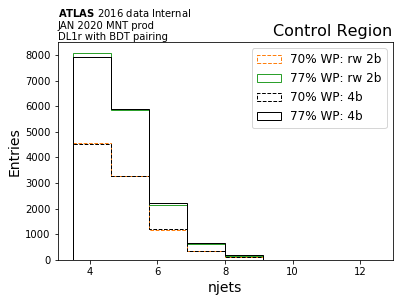

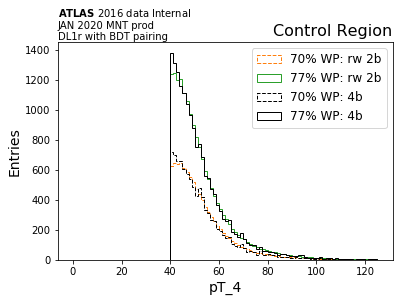

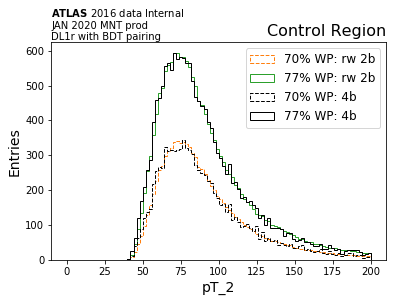

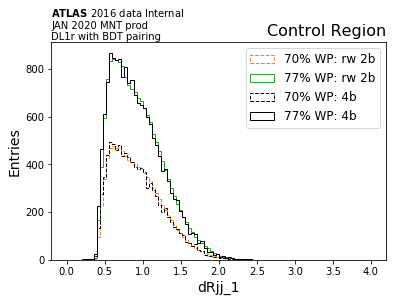

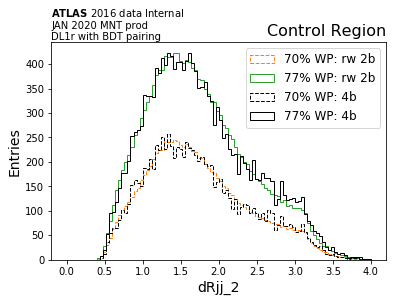

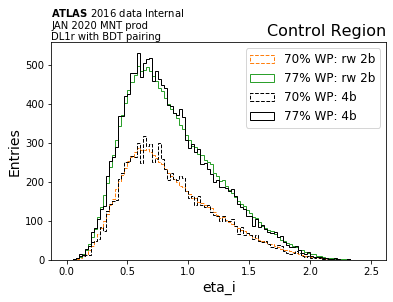

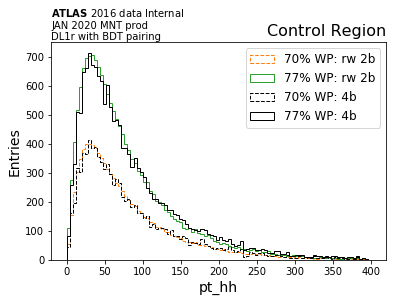

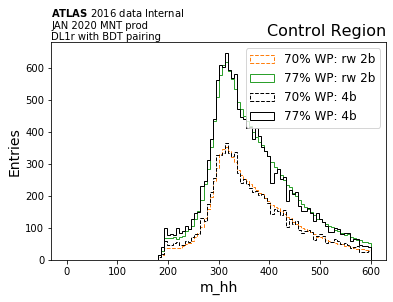

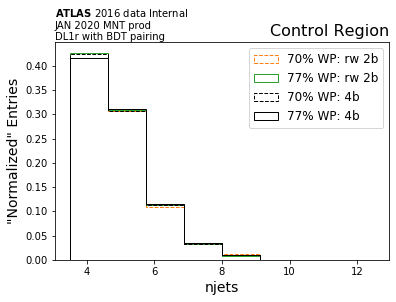

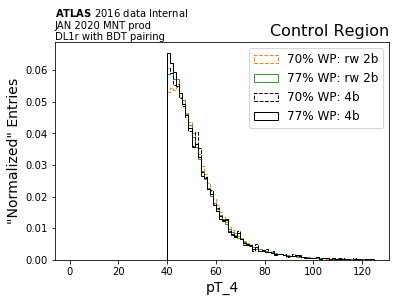

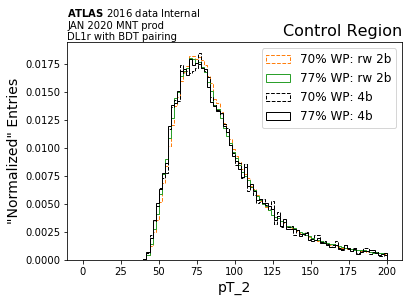

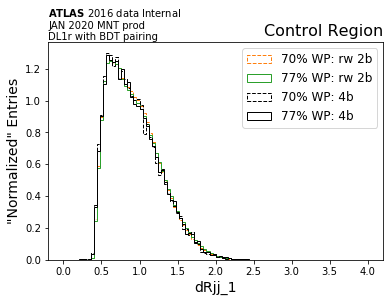

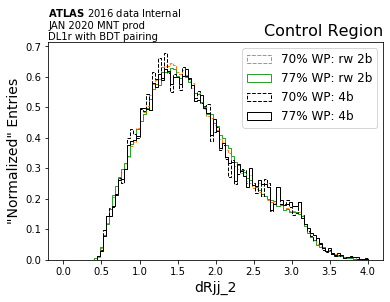

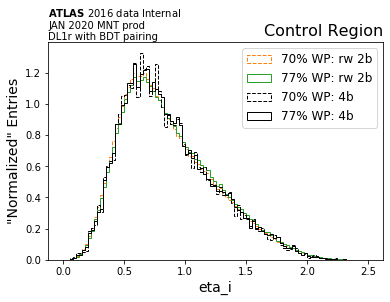

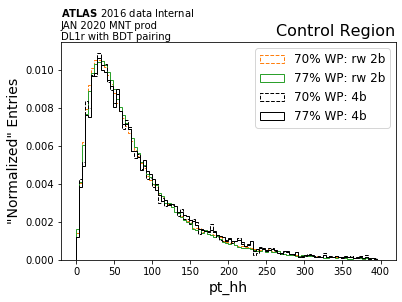

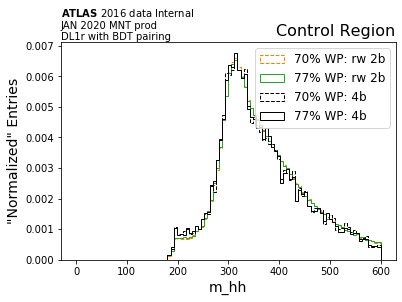

In [52]:
region=2

for density, ylabel, tag in zip([False,True],['','"Normalized" '],['','_norm']):
    for c,n,r in zip(rw_vars,nBins,myRanges):

        plt.figure()
        plt.hist(df_70.loc[(df_70.ntag==2)&(df_70.kinematic_region==region),c], 
                 n, r, color='C1',linestyle='--',
                 histtype='step',label='70% WP: rw 2b',density=density,
                 weights=df_70.loc[(df_70.ntag==2)&(df_70.kinematic_region==region),'w_2b'])    
        plt.hist(df_77.loc[(df_77.ntag==2)&(df_77.kinematic_region==region),c], 
                 n, r, color='C2',
                 histtype='step',label='77% WP: rw 2b',density=density,
                 weights=df_77.loc[(df_77.ntag==2)&(df_77.kinematic_region==region),'w_2b'])
        
        plt.hist(df_70.loc[(df_70.ntag>=4)&(df_70.kinematic_region==region),c],
                 n,r,color='k',linestyle='--',
                 histtype='step',label='70% WP: 4b',density=density)
        plt.hist(df_77.loc[(df_77.ntag>=4)&(df_77.kinematic_region==region),c],
                 n,r,color='k',
                 histtype='step',label='77% WP: 4b',density=density)
        
        plt.xlabel(c,fontsize=14)
        plt.ylabel(ylabel+'Entries',fontsize=14)
        plt.legend(fontsize=12)
        plt.title('Control Region',loc='right',fontsize=16)

        ax = plt.gca()
        plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

        plt.savefig(f'figures/PC_studies/{c}_dl1r_70_77{tag}.pdf',bbox_inches='tight')
        plt.show()

Ok, based on these figures, I *think* it looks like we will be fine using the inclusive sample for the 2b estimate and then just scaling the yields in the SB.

**What categories do I want to put in this next plot?**
- The histograme from the DL1r analysis with the 70% WP (b/c the previous study showed that we didn't gain anything from categorizing more finely)
- 3 Q5, 1 Q3
- 2 Q5, 1 Q4, 1 Q3
- 2 Q5, 2 Q3

In [68]:
# w_70
N2b = np.sum(df_77.loc[(df_77.ntag==2) & (df_77.kinematic_region==2),'NN_d24_weight_16'])
N4b = np.sum((df_77.ntag>=4) & (df_77.nQ3==0) & (df_77.kinematic_region==2))
df_77['w_2b_70'] = (N4b / N2b) * df_77['NN_d24_weight_16']

# 3 Q5 1 Q3
N4b = np.sum((df_77.nQ5==3)&(df_77.nQ3==1)&(df_77.kinematic_region==2))
df_77['w_2b_3Q5_1Q3'] = (N4b / N2b) * df_77['NN_d24_weight_16']

# 2 Q5 1 Q4 1 Q3
N4b = np.sum((df_77.nQ5==2)&(df_77.nQ4==1)&(df_77.nQ3==1)&(df_77.kinematic_region==2))
df_77['w_2b_2Q5_1Q4_1Q3'] = (N4b / N2b) * df_77['NN_d24_weight_16']

# 2 Q5 2 Q3
N4b = np.sum((df_77.nQ5==2)&(df_77.nQ3==2)&(df_77.kinematic_region==2))
df_77['w_2b_2Q5_2Q3'] = (N4b / N2b) * df_77['NN_d24_weight_16']

In [66]:
N4b

1205

In [67]:
np.sum((df_77.ntag>=4) & (sig.nQ3==0) & (df_77.kinematic_region==2))

89

In [ ]:
np.sum((df_77.ntag>=4) & (sig.nQ3==0) & (df_77.kinematic_region==2))

70% WP : s= 4.470160359778469 , b= 5124.24812984321


/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


3 Q5, 1 Q3 : s= 0.7741776019640785 , b= 1722.4592850687545
2 Q5, 1 Q4, 1 Q3 : s= 0.38808602440110995 , b= 1166.1404224744358
2 Q5, 2 Q3 : s= 0.11274531288309603 , b= 657.8647982592264


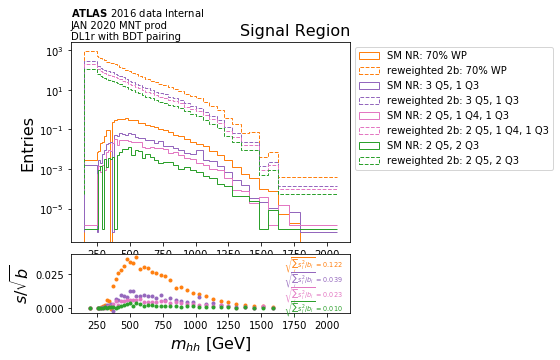

In [69]:
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(4,1)
ax1 = fig.add_subplot(gs[:3,0])
ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)

bmask = (df_77.ntag==2) & (df_77.kinematic_region==0)

# Loop through the options (using the bdt pairing)
for smask,w2b,color,ytxt,label in zip([(sig.ntag>=4)&(sig.nQ3==0)&(sig.nQ2==0), (sig.nQ5==3)&(sig.nQ3==1), 
                                       (sig.nQ5==2)&(sig.nQ4==1)&(sig.nQ3==1), (sig.nQ5==2)&(sig.nQ3==2)],
                                      ['w_2b_70','w_2b_3Q5_1Q3','w_2b_2Q5_1Q4_1Q3','w_2b_2Q5_2Q3'],
                                      ['C1','C4','C6','C2'],[1,.75,.5,.25],
                                      ['70% WP','3 Q5, 1 Q3','2 Q5, 1 Q4, 1 Q3','2 Q5, 2 Q3']):

    # signal
    s,_,_ = ax1.hist(sig.loc[smask,'m_hh'],
                     edges,color=color,histtype='step',log=True,
                     label="SM NR: "+label,ls='-',
                     weights=sig.loc[smask,'mc_sf'])

    # background
    b,_,_ = ax1.hist(df_77.loc[bmask,'m_hh'],
                     edges,color=color,histtype='step',log=True,
                     label="reweighted 2b: "+label,ls='--',
                     weights=df_77.loc[bmask,w2b])

    print(label,": s=",np.sum(s),", b=",np.sum(b))
    
    # Significance (it probably would be a good idea to put mv2 and dl1r in different subpanels)
    ax2.plot(x,s/np.sqrt(b),marker='.',color=color,linewidth=0)

    # Calculate the limit
    sigText = '$\sqrt{\sum_i{s_i^2 / b_i}}$ = '

    ax2.text(.975,ytxt,sigText+'{:.3f}'.format(np.sqrt(np.sum(s[b!=0]**2 / b[b!=0]))),
             ha='right',va='top',fontsize=6.5,
             transform=ax2.transAxes,color=color)

# Text per subfig
ax2.set_ylabel('$s / \sqrt{b}$',fontsize=16)

    
# Make the plot pretty
ax2.set_xlabel('$m_{hh}$ [GeV]',fontsize=16)
ax1.set_ylabel('Entries', fontsize=16)
ax1.set_title('Signal Region', loc='right',fontsize=16)
ax1.legend(bbox_to_anchor=(1,1))

ax1.text(0,1,text,ha='left',va='bottom',transform=ax1.transAxes)

#plt.savefig('figures/m_hh_SR_m.pdf',bbox_inches='tight')

plt.show()

In [72]:
np.sqrt(.122**2+.039**2+.023**2+.01**2)

0.1305143670252436

In [71]:
np.sqrt(.122**2+.039**2+.023**2+.01**2)/.128

1.0196434923847157

Ok, this is just a 2% improvement w/r.t. doing it all inclusively.

**Last check: 85% WP**

Categories that I want to try from looking at the signal efficiency:
- 3 Q5, 1 Q2
- 2 Q5, 1 Q4, 1 Q2
- 2 Q5, 1 Q3, 1 Q2
- 2 Q5, 1 Q3, 1 Q2
- 2 Q5, 2 Q2

So, I can always go *back* and do more detail oriented checks, but for now I'm just going to take these categories, assume that the inclusive reweighting works, and look at $m_{hh}$

In [74]:
# w_70
N2b = np.sum(df_85.loc[(df_85.ntag==2) & (df_85.kinematic_region==2),'NN_d24_weight_16'])
N4b = np.sum((df_85.ntag>=4) & (df_85.nQ2==0) & (df_85.kinematic_region==2))
df_85['w_2b_77'] = (N4b / N2b) * df_85['NN_d24_weight_16']

# 3 Q5 1 Q2
N4b = np.sum((df_85.nQ5==3)&(df_85.nQ2==1)&(df_85.kinematic_region==2))
df_85['w_2b_3Q5_1Q2'] = (N4b / N2b) * df_85['NN_d24_weight_16']

# 2 Q5 1 Q4 1 Q2
N4b = np.sum((df_85.nQ5==2)&(df_85.nQ4==1)&(df_85.nQ2==1)&(df_85.kinematic_region==2))
df_85['w_2b_2Q5_1Q4_1Q2'] = (N4b / N2b) * df_85['NN_d24_weight_16']

# 2 Q5 1 Q3 1 Q2
N4b = np.sum((df_85.nQ5==2)&(df_85.nQ3==1)&(df_85.nQ2==1)&(df_85.kinematic_region==2))
df_85['w_2b_2Q5_1Q4_1Q2'] = (N4b / N2b) * df_85['NN_d24_weight_16']

# 2 Q5 2 Q2
N4b = np.sum((df_85.nQ5==2)&(df_85.nQ2==2)&(df_85.kinematic_region==2))
df_85['w_2b_3Q5_1Q2'] = (N4b / N2b) * df_85['NN_d24_weight_16']

'''
Other possibilities to try:
- 1 Q5, 1 Q4, 1 Q3, 1 Q2
- 1 Q5, 2 Q4, 1 Q2
- 1 Q5, 1 Q4, 2 Q2
'''


'\nOther possibilities to try:\n1 Q5, 1 Q4, 1 Q3, 1 Q2\n1 Q5, 2 Q4, 1 Q2\n1 Q5, 1 Q4, 2 Q2\n'

77% WP : s= 4.470160359778469 , b= 5152.192805132783


/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


3 Q5 1 Q2 : s= 0.9784489030808036 , b= 1327.811990449343
2 Q5 1 Q4 1 Q2 : s= 0.4580814473539191 , b= 1328.8976911774323
2 Q5 1 Q3 1 Q2 : s= 0.2800486982895407 , b= 1328.8976911774323
2 Q5, 2 Q2 : s= 0.11274531288309603 , b= 1327.811990449343


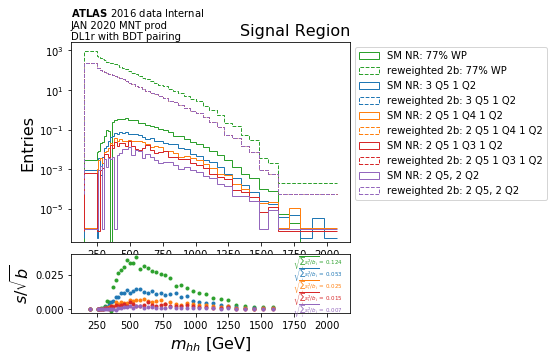

In [76]:
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(4,1)
ax1 = fig.add_subplot(gs[:3,0])
ax2 = fig.add_subplot(gs[3:,0],sharex=ax1)

bmask = (df_85.ntag==2) & (df_85.kinematic_region==0)

# Loop through the options (using the bdt pairing)
for smask,w2b,color,ytxt,label in zip([(sig.ntag>=4)&(sig.nQ2==0), 
                                       (sig.nQ5==3)&(sig.nQ2==1),
                                       (sig.nQ5==2)&(sig.nQ4==1)&(sig.nQ2==1),
                                       (sig.nQ5==2)&(sig.nQ3==1)&(sig.nQ2==1),
                                       (sig.nQ5==2)&(sig.nQ3==2)],
                                      ['w_2b_77','w_2b_3Q5_1Q2','w_2b_2Q5_1Q4_1Q2','w_2b_2Q5_1Q4_1Q2','w_2b_3Q5_1Q2'],
                                      ['C2','C0','C1','C3','C4'],[1,.8,.6,.4,.2],
                                      ['77% WP','3 Q5 1 Q2','2 Q5 1 Q4 1 Q2','2 Q5 1 Q3 1 Q2','2 Q5, 2 Q2']):

    # signal
    s,_,_ = ax1.hist(sig.loc[smask,'m_hh'],
                     edges,color=color,histtype='step',log=True,
                     label="SM NR: "+label,ls='-',
                     weights=sig.loc[smask,'mc_sf'])

    # background
    b,_,_ = ax1.hist(df_85.loc[bmask,'m_hh'],
                     edges,color=color,histtype='step',log=True,
                     label="reweighted 2b: "+label,ls='--',
                     weights=df_85.loc[bmask,w2b])

    print(label,": s=",np.sum(s),", b=",np.sum(b))
    
    # Significance (it probably would be a good idea to put mv2 and dl1r in different subpanels)
    ax2.plot(x,s/np.sqrt(b),marker='.',color=color,linewidth=0)

    # Calculate the limit
    sigText = '$\sqrt{\sum_i{s_i^2 / b_i}}$ = '

    ax2.text(.975,ytxt,sigText+'{:.3f}'.format(np.sqrt(np.sum(s[b!=0]**2 / b[b!=0]))),
             ha='right',va='top',fontsize=5.5,
             transform=ax2.transAxes,color=color)

# Text per subfig
ax2.set_ylabel('$s / \sqrt{b}$',fontsize=16)

    
# Make the plot pretty
ax2.set_xlabel('$m_{hh}$ [GeV]',fontsize=16)
ax1.set_ylabel('Entries', fontsize=16)
ax1.set_title('Signal Region', loc='right',fontsize=16)
ax1.legend(bbox_to_anchor=(1,1))

ax1.text(0,1,text,ha='left',va='bottom',transform=ax1.transAxes)

#plt.savefig('figures/m_hh_SR_m.pdf',bbox_inches='tight')

plt.show()

In [83]:
np.sqrt(.124**2+.053**2)

0.1348517704741024

In [85]:
np.sqrt(.124**2+.053**2)/.128,np.sqrt(.124**2+.053**2)/.124

(1.053529456828925, 1.0875142780169549)

In [82]:
np.sqrt(.124**2+.053**2+.025**2+.015**2+.007**2)

0.13814485151463302